# **Required Packages**

In [1]:
pip install mysql-connector-python pandas requests pycountry seaborn matplotlib plotly

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 33.9/33.9 MB 52.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.3/6.3 MB 103.7 MB/s eta 0:00:00


# **Step 1: Dataset Collection and Initial Processing**
**Nutrition Paradox Project - WHO Data Analysis**

## Public Dataset Exploration
4 public WHO API URLs  each representing a different nutritional indicator have been provided:
**For Obesity:**

https://ghoapi.azureedge.net/api/NCD_BMI_30C ‚Äì Obesity among adults (BMI ‚â• 30)

https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C ‚Äì Obesity/Overweight among children

**For Malnutrition:**

https://ghoapi.azureedge.net/api/NCD_BMI_18C ‚Äì Underweight in adults (BMI < 18.5)

https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C ‚Äì Thinness in children

Each dataset provides estimates by country, sex, year, and region, along with confidence intervals (upper and lower bounds).


In [2]:
import requests
import pandas as pd
import mysql.connector
from mysql.connector import Error
import pycountry

In [3]:
# Define the API endpoints
obesity_adults_url = "https://ghoapi.azureedge.net/api/NCD_BMI_30C"
obesity_children_url = "https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C"
malnutrition_adults_url = "https://ghoapi.azureedge.net/api/NCD_BMI_18C"
malnutrition_children_url = "https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"

## User-Defined Function

In [4]:
# Function to fetch and process data
def fetch_data(url, age_group):
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data['value'])
    df['age_group'] = age_group
    return df

### New Columns to Create:
**age_group**:

Manually assign this column based on the dataset source
---

-Use "Adult" for datasets NCD_BMI_30C and NCD_BMI_18C.


---

-Use "Child/Adolescent" for datasets NCD_BMI_PLUS2C and NCD_BMI_MINUS2C.

---

In [5]:
# Fetch all datasets
df_obesity_adults = fetch_data(obesity_adults_url, "Adult")
df_obesity_children = fetch_data(obesity_children_url, "Child/Adolescent")
df_malnutrition_adults = fetch_data(malnutrition_adults_url, "Adult")
df_malnutrition_children = fetch_data(malnutrition_children_url, "Child/Adolescent")

In [6]:
# Combine obesity and malnutrition datasets
df_obesity = pd.concat([df_obesity_adults, df_obesity_children])
df_malnutrition = pd.concat([df_malnutrition_adults, df_malnutrition_children])

## Filter each dataset to include only records from the years 2012 to 2022

In [7]:
# Filter for years 2012-2022
df_obesity = df_obesity[df_obesity['TimeDim'].between(2012, 2022)]
df_malnutrition = df_malnutrition[df_malnutrition['TimeDim'].between(2012, 2022)]

In [8]:
df_obesity

Id   IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
4           364     NCD_BMI_30C        COUNTRY        IRN                EMR   
11         4909     NCD_BMI_30C        COUNTRY        IRQ                EMR   
17         6516     NCD_BMI_30C        COUNTRY        GRL                EUR   
19         7785     NCD_BMI_30C        COUNTRY        ARM                EUR   
20         8855     NCD_BMI_30C        COUNTRY        MLT                EUR   
...         ...             ...            ...        ...                ...   
62347  10114473  NCD_BMI_PLUS2C        COUNTRY        TJK                EUR   
62350  10115376  NCD_BMI_PLUS2C        COUNTRY        SOM                EMR   
62358  10116897  NCD_BMI_PLUS2C        COUNTRY        VUT                WPR   
62361  10117364  NCD_BMI_PLUS2C        COUNTRY        MDG                AFR   
62364  10117872  NCD_BMI_PLUS2C        COUNTRY        FIN                EUR   

      TimeDimType         ParentLocation Dim1Type      Dim1  TimeDim  ...  \
4            YEAR  Eastern Mediterranean      SEX   SEX_MLE     2020  ...   
11           YEAR  Eastern Mediterranean      SEX   SEX_MLE     2020  ...   
17           YEAR                 Europe      SEX  SEX_FMLE     2014  ...   
19           YEAR                 Europe      SEX  SEX_FMLE     2019  ...   
20           YEAR                 Europe      SEX  SEX_BTSX     2018  ...   
...           ...                    ...      ...       ...      ...  ...   
62347        YEAR                 Europe      SEX  SEX_BTSX     2020  ...   
62350        YEAR  Eastern Mediterranean      SEX  SEX_FMLE     2012  ...   
62358        YEAR        Western Pacific      SEX   SEX_MLE     2021  ...   
62361        YEAR                 Africa      SEX   SEX_MLE     2014  ...   
62364        YEAR                 Europe      SEX   SEX_MLE     2017  ...   

                  Value NumericValue        Low       High Comments  \
4      17.5 [15.8-19.2]    17.487641  15.793777  19.245727     None   
11     28.3 [23.1-33.8]    28.335530  23.089589  33.815336     None   
17     27.9 [24.9-31.2]    27.948704  24.924766  31.213260     None   
19     31.9 [28.2-35.6]    31.893221  28.160682  35.574925     None   
20     33.7 [29.9-37.5]    33.694205  29.905805  37.470856     None   
...                 ...          ...        ...        ...      ...   
62347     1.5 [1.0-2.2]     1.475931   0.964176   2.197432     None   
62350     2.0 [0.3-5.9]     1.966190   0.302039   5.872414     None   
62358   16.6 [3.3-34.9]    16.634887   3.325899  34.877816     None   
62361     2.0 [0.2-6.3]     2.032189   0.236481   6.341185     None   
62364  11.4 [10.1-12.8]    11.390631  10.087850  12.760153     None   

                                Date TimeDimensionValue  \
4      2024-02-29T16:06:41.017+01:00               2020   
11     2024-02-29T16:06:41.017+01:00               2020   
17     2024-02-29T16:06:41.017+01:00               2014   
19     2024-02-29T16:06:41.017+01:00               2019   
20     2024-02-29T16:06:41.017+01:00               2018   
...                              ...                ...   
62347  2024-02-29T16:06:41.017+01:00               2020   
62350  2024-02-29T16:06:41.017+01:00               2012   
62358  2024-02-29T16:06:41.017+01:00               2021   
62361  2024-02-29T16:06:41.017+01:00               2014   
62364  2024-02-29T16:06:41.017+01:00               2017   

              TimeDimensionBegin           TimeDimensionEnd         age_group  
4      2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00             Adult  
11     2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00             Adult  
17     2014-01-01T00:00:00+01:00  2014-12-31T00:00:00+01:00             Adult  
19     2019-01-01T00:00:00+01:00  2019-12-31T00:00:00+01:00             Adult  
20     2018-01-01T00:00:00+01:00  2018-12-31T00:00:00+01:00             Adult  
...                          ...                        ...               ...  
62347

In [9]:
df_malnutrition

Id    IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0       7639674      NCD_BMI_18C        COUNTRY        LBR                AFR   
1       7639779      NCD_BMI_18C        COUNTRY        SYR                EMR   
3            54      NCD_BMI_18C        COUNTRY        GAB                AFR   
7          2272      NCD_BMI_18C        COUNTRY        MNG                WPR   
8          2584      NCD_BMI_18C        COUNTRY        SLE                AFR   
...         ...              ...            ...        ...                ...   
62357  10115264  NCD_BMI_MINUS2C        COUNTRY        HTI                AMR   
62359  10116273  NCD_BMI_MINUS2C        COUNTRY        TJK                EUR   
62360  10116414  NCD_BMI_MINUS2C        COUNTRY        PNG                WPR   
62366  10117545  NCD_BMI_MINUS2C        COUNTRY        WSM                WPR   
62369  10118666  NCD_BMI_MINUS2C        COUNTRY        ISL                EUR   

      TimeDimType         ParentLocation Dim1Type      Dim1  TimeDim  ...  \
0            YEAR                 Africa      SEX  SEX_BTSX     2019  ...   
1            YEAR  Eastern Mediterranean      SEX  SEX_BTSX     2013  ...   
3            YEAR                 Africa      SEX  SEX_FMLE     2021  ...   
7            YEAR        Western Pacific      SEX  SEX_BTSX     2017  ...   
8            YEAR                 Africa      SEX  SEX_FMLE     2016  ...   
...           ...                    ...      ...       ...      ...  ...   
62357        YEAR               Americas      SEX  SEX_FMLE     2013  ...   
62359        YEAR                 Europe      SEX  SEX_BTSX     2018  ...   
62360        YEAR        Western Pacific      SEX  SEX_BTSX     2016  ...   
62366        YEAR        Western Pacific      SEX  SEX_FMLE     2020  ...   
62369        YEAR                 Europe      SEX   SEX_MLE     2018  ...   

                Value NumericValue       Low       High Comments  \
0       6.1 [5.0-7.5]     6.147330  4.974405   7.479860     None   
1       3.0 [1.8-4.7]     3.042609  1.770855   4.654348     None   
3       5.8 [4.0-8.1]     5.795110  3.972036   8.077021     None   
7       3.1 [2.4-3.8]     3.090652  2.428230   3.842155     None   
8      8.4 [6.7-10.3]     8.371724  6.655668  10.253121     None   
...               ...          ...       ...        ...      ...   
62357   4.1 [2.8-5.7]     4.140693  2.795499   5.714345     None   
62359  7.6 [5.4-10.2]     7.574986  5.428173  10.218395     None   
62360   1.7 [0.6-3.5]     1.703645  0.621721   3.507061     None   
62366   0.7 [0.1-2.8]     0.734066  0.064152   2.810176     None   
62369   2.5 [0.5-7.3]     2.542785  0.465171   7.307483     None   

                                Date TimeDimensionValue  \
0      2024-02-29T16:06:41.017+01:00               2019   
1      2024-02-29T16:06:41.017+01:00               2013   
3      2024-02-29T16:06:41.017+01:00               2021   
7      2024-02-29T16:06:41.017+01:00               2017   
8      2024-02-29T16:06:41.017+01:00               2016   
...                              ...                ...   
62357  2024-02-29T16:06:41.017+01:00               2013   
62359  2024-02-29T16:06:41.017+01:00               2018   
62360  2024-02-29T16:06:41.017+01:00               2016   
62366  2024-02-29T16:06:41.017+01:00               2020   
62369  2024-02-29T16:06:41.017+01:00               2018   

              TimeDimensionBegin           TimeDimensionEnd         age_group  
0      2019-01-01T00:00:00+01:00  2019-12-31T00:00:00+01:00             Adult  
1      2013-01-01T00:00:00+01:00  2013-12-31T00:00:00+01:00             Adult  
3      2021-01-01T00:00:00+01:00  2021-12-31T00:00:00+01:00             Adult  
7      2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00             Adult  
8      2016-01-01T00:00:00+01:00  2016-12-31T00:00:00+01:00             Adult  
...                          ...                        ...               ...  
62357  2013-01-01T00:00:00+01

# **Step 2: Data Cleaning and Feature Engineering**

## Define columns to retain and rename

In [10]:
columns_to_keep = {
    'ParentLocation': 'Region',
    'Dim1': 'Gender',
    'TimeDim': 'Year',
    'Low': 'LowerBound',
    'High': 'UpperBound',
    'NumericValue': 'Mean_Estimate',
    'SpatialDim': 'Country',
    'age_group': 'age_group'
}

In [11]:
df_obesity.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim',
       'ParentLocationCode', 'TimeDimType', 'ParentLocation', 'Dim1Type',
       'Dim1', 'TimeDim', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'NumericValue', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd', 'age_group'],
      dtype='object')

In [12]:
df_malnutrition.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim',
       'ParentLocationCode', 'TimeDimType', 'ParentLocation', 'Dim1Type',
       'Dim1', 'TimeDim', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'NumericValue', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd', 'age_group'],
      dtype='object')

In [13]:
# Apply column selection and renaming
df_obesity = df_obesity[columns_to_keep.keys()].rename(columns=columns_to_keep)
df_malnutrition = df_malnutrition[columns_to_keep.keys()].rename(columns=columns_to_keep)

In [14]:
df_obesity

Region    Gender  Year  LowerBound  UpperBound  \
4      Eastern Mediterranean   SEX_MLE  2020   15.793777   19.245727   
11     Eastern Mediterranean   SEX_MLE  2020   23.089589   33.815336   
17                    Europe  SEX_FMLE  2014   24.924766   31.213260   
19                    Europe  SEX_FMLE  2019   28.160682   35.574925   
20                    Europe  SEX_BTSX  2018   29.905805   37.470856   
...                      ...       ...   ...         ...         ...   
62347                 Europe  SEX_BTSX  2020    0.964176    2.197432   
62350  Eastern Mediterranean  SEX_FMLE  2012    0.302039    5.872414   
62358        Western Pacific   SEX_MLE  2021    3.325899   34.877816   
62361                 Africa   SEX_MLE  2014    0.236481    6.341185   
62364                 Europe   SEX_MLE  2017   10.087850   12.760153   

       Mean_Estimate Country         age_group  
4          17.487641     IRN             Adult  
11         28.335530     IRQ             Adult  
17         27.948704     GRL             Adult  
19         31.893221     ARM             Adult  
20         33.694205     MLT             Adult  
...              ...     ...               ...  
62347       1.475931     TJK  Child/Adolescent  
62350       1.966190     SOM  Child/Adolescent  
62358      16.634887     VUT  Child/Adolescent  
62361       2.032189     MDG  Child/Adolescent  
62364      11.390631     FIN  Child/Adolescent  

[27720 rows x 8 columns]

In [15]:
df_malnutrition

Region    Gender  Year  LowerBound  UpperBound  \
0                     Africa  SEX_BTSX  2019    4.974405    7.479860   
1      Eastern Mediterranean  SEX_BTSX  2013    1.770855    4.654348   
3                     Africa  SEX_FMLE  2021    3.972036    8.077021   
7            Western Pacific  SEX_BTSX  2017    2.428230    3.842155   
8                     Africa  SEX_FMLE  2016    6.655668   10.253121   
...                      ...       ...   ...         ...         ...   
62357               Americas  SEX_FMLE  2013    2.795499    5.714345   
62359                 Europe  SEX_BTSX  2018    5.428173   10.218395   
62360        Western Pacific  SEX_BTSX  2016    0.621721    3.507061   
62366        Western Pacific  SEX_FMLE  2020    0.064152    2.810176   
62369                 Europe   SEX_MLE  2018    0.465171    7.307483   

       Mean_Estimate Country         age_group  
0           6.147330     LBR             Adult  
1           3.042609     SYR             Adult  
3           5.795110     GAB             Adult  
7           3.090652     MNG             Adult  
8           8.371724     SLE             Adult  
...              ...     ...               ...  
62357       4.140693     HTI  Child/Adolescent  
62359       7.574986     TJK  Child/Adolescent  
62360       1.703645     PNG  Child/Adolescent  
62366       0.734066     WSM  Child/Adolescent  
62369       2.542785     ISL  Child/Adolescent  

[27720 rows x 8 columns]

## Country Column

In [17]:
# Handle special country cases
special_cases = {
    'GLOBAL': 'Global',
    'WB_LMI': 'Low & Middle Income',
    'WB_HI': 'High Income',
    'WB_LI': 'Low Income',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe',
    'AFR': 'Africa',
    'SEAR': 'South-East Asia Region',
    'WPR': 'Western Pacific Region',
    'AMR': 'Americas Region',
    'WB_UMI': 'Upper Middle Income'
}

In [18]:
def convert_country_code(code):
    # Converts country codes to full country names or special region names
    if code in special_cases:
        return special_cases[code]
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return code

In [19]:
# Apply country code conversion
df_obesity['Country'] = df_obesity['Country'].apply(convert_country_code)
df_malnutrition['Country'] = df_malnutrition['Country'].apply(convert_country_code)

In [20]:
df_obesity

Region    Gender  Year  LowerBound  UpperBound  \
4      Eastern Mediterranean   SEX_MLE  2020   15.793777   19.245727   
11     Eastern Mediterranean   SEX_MLE  2020   23.089589   33.815336   
17                    Europe  SEX_FMLE  2014   24.924766   31.213260   
19                    Europe  SEX_FMLE  2019   28.160682   35.574925   
20                    Europe  SEX_BTSX  2018   29.905805   37.470856   
...                      ...       ...   ...         ...         ...   
62347                 Europe  SEX_BTSX  2020    0.964176    2.197432   
62350  Eastern Mediterranean  SEX_FMLE  2012    0.302039    5.872414   
62358        Western Pacific   SEX_MLE  2021    3.325899   34.877816   
62361                 Africa   SEX_MLE  2014    0.236481    6.341185   
62364                 Europe   SEX_MLE  2017   10.087850   12.760153   

       Mean_Estimate                    Country         age_group  
4          17.487641  Iran, Islamic Republic of             Adult  
11         28.335530                       Iraq             Adult  
17         27.948704                  Greenland             Adult  
19         31.893221                    Armenia             Adult  
20         33.694205                      Malta             Adult  
...              ...                        ...               ...  
62347       1.475931                 Tajikistan  Child/Adolescent  
62350       1.966190                    Somalia  Child/Adolescent  
62358      16.634887                    Vanuatu  Child/Adolescent  
62361       2.032189                 Madagascar  Child/Adolescent  
62364      11.390631                    Finland  Child/Adolescent  

[27720 rows x 8 columns]

## Standardize Gender values

In [22]:
df_obesity['Gender'].unique()

array(['SEX_MLE', 'SEX_FMLE', 'SEX_BTSX'], dtype=object)

In [23]:
gender_mapping = {'SEX_MLE': 'Male',
                  'SEX_FMLE': 'Female',
                  'SEX_BTSX': 'Both',
                  }

In [24]:
# df_obesity['Gender'] = df_obesity['Gender'].replace{'SEX_MLE': 'Male',
#                   'SEX_FMLE': 'Female',
#                   'SEX_BTSX': 'Both',
#                   }

In [25]:
df_obesity['Gender'] = df_obesity['Gender'].map(gender_mapping)
print(f"Gender values: {df_obesity['Gender'].unique()}")

Gender values: ['Male' 'Female' 'Both']


In [26]:
df_malnutrition['Gender'] = df_malnutrition['Gender'].map(gender_mapping)
print(f"Gender values: {df_malnutrition['Gender'].unique()}")

Gender values: ['Both' 'Female' 'Male']


## New Columns to Create:

**CI_Width**:

Calculate the confidence interval width.
Formula: CI_Width = High - Low

**obesity_level (for the obesity table only):**


**Categorize obesity levels based on NumericValue:**

>= 30 ‚Üí High

25‚Äì29.9 ‚Üí Moderate

< 25 ‚Üí Low


**malnutrition_level (for the malnutrition table only):**

**Categorize malnutrition levels based on NumericValue:**

>= 20 ‚Üí High

10‚Äì19.9 ‚Üí Moderate

< 10 ‚Üí Low

In [27]:
# Create new features
df_obesity['CI_Width'] = df_obesity['UpperBound'] - df_obesity['LowerBound']
df_malnutrition['CI_Width'] = df_malnutrition['UpperBound'] - df_malnutrition['LowerBound']

In [28]:
df_obesity

Region  Gender  Year  LowerBound  UpperBound  \
4      Eastern Mediterranean    Male  2020   15.793777   19.245727   
11     Eastern Mediterranean    Male  2020   23.089589   33.815336   
17                    Europe  Female  2014   24.924766   31.213260   
19                    Europe  Female  2019   28.160682   35.574925   
20                    Europe    Both  2018   29.905805   37.470856   
...                      ...     ...   ...         ...         ...   
62347                 Europe    Both  2020    0.964176    2.197432   
62350  Eastern Mediterranean  Female  2012    0.302039    5.872414   
62358        Western Pacific    Male  2021    3.325899   34.877816   
62361                 Africa    Male  2014    0.236481    6.341185   
62364                 Europe    Male  2017   10.087850   12.760153   

       Mean_Estimate                    Country         age_group   CI_Width  
4          17.487641  Iran, Islamic Republic of             Adult   3.451950  
11         28.335530                       Iraq             Adult  10.725747  
17         27.948704                  Greenland             Adult   6.288494  
19         31.893221                    Armenia             Adult   7.414243  
20         33.694205                      Malta             Adult   7.565051  
...              ...                        ...               ...        ...  
62347       1.475931                 Tajikistan  Child/Adolescent   1.233255  
62350       1.966190                    Somalia  Child/Adolescent   5.570375  
62358      16.634887                    Vanuatu  Child/Adolescent  31.551917  
62361       2.032189                 Madagascar  Child/Adolescent   6.104704  
62364      11.390631                    Finland  Child/Adolescent   2.672303  

[27720 rows x 9 columns]

In [29]:
df_malnutrition

Region  Gender  Year  LowerBound  UpperBound  \
0                     Africa    Both  2019    4.974405    7.479860   
1      Eastern Mediterranean    Both  2013    1.770855    4.654348   
3                     Africa  Female  2021    3.972036    8.077021   
7            Western Pacific    Both  2017    2.428230    3.842155   
8                     Africa  Female  2016    6.655668   10.253121   
...                      ...     ...   ...         ...         ...   
62357               Americas  Female  2013    2.795499    5.714345   
62359                 Europe    Both  2018    5.428173   10.218395   
62360        Western Pacific    Both  2016    0.621721    3.507061   
62366        Western Pacific  Female  2020    0.064152    2.810176   
62369                 Europe    Male  2018    0.465171    7.307483   

       Mean_Estimate               Country         age_group  CI_Width  
0           6.147330               Liberia             Adult  2.505455  
1           3.042609  Syrian Arab Republic             Adult  2.883493  
3           5.795110                 Gabon             Adult  4.104985  
7           3.090652              Mongolia             Adult  1.413925  
8           8.371724          Sierra Leone             Adult  3.597453  
...              ...                   ...               ...       ...  
62357       4.140693                 Haiti  Child/Adolescent  2.918846  
62359       7.574986            Tajikistan  Child/Adolescent  4.790222  
62360       1.703645      Papua New Guinea  Child/Adolescent  2.885340  
62366       0.734066                 Samoa  Child/Adolescent  2.746023  
62369       2.542785               Iceland  Child/Adolescent  6.842312  

[27720 rows x 9 columns]

## **Obesity_level & Malnutrition_level**

In [35]:
def categorize_obesity(value):
    if value >= 30:
        return 'High'
    elif value >= 25:
        return 'Moderate'
    else:
        return 'Low'

In [34]:
def categorize_malnutrition(value):
    if value >= 20:
        return 'High'
    elif value >= 10:
        return 'Moderate'
    else:
        return 'Low'

In [36]:
df_obesity['obesity_level'] = df_obesity['Mean_Estimate'].apply(categorize_obesity)
df_malnutrition['malnutrition_level'] = df_malnutrition['Mean_Estimate'].apply(categorize_malnutrition)

In [37]:
df_obesity

Region  Gender  Year  LowerBound  UpperBound  \
4      Eastern Mediterranean    Male  2020   15.793777   19.245727   
11     Eastern Mediterranean    Male  2020   23.089589   33.815336   
17                    Europe  Female  2014   24.924766   31.213260   
19                    Europe  Female  2019   28.160682   35.574925   
20                    Europe    Both  2018   29.905805   37.470856   
...                      ...     ...   ...         ...         ...   
62347                 Europe    Both  2020    0.964176    2.197432   
62350  Eastern Mediterranean  Female  2012    0.302039    5.872414   
62358        Western Pacific    Male  2021    3.325899   34.877816   
62361                 Africa    Male  2014    0.236481    6.341185   
62364                 Europe    Male  2017   10.087850   12.760153   

       Mean_Estimate                    Country         age_group   CI_Width  \
4          17.487641  Iran, Islamic Republic of             Adult   3.451950   
11         28.335530                       Iraq             Adult  10.725747   
17         27.948704                  Greenland             Adult   6.288494   
19         31.893221                    Armenia             Adult   7.414243   
20         33.694205                      Malta             Adult   7.565051   
...              ...                        ...               ...        ...   
62347       1.475931                 Tajikistan  Child/Adolescent   1.233255   
62350       1.966190                    Somalia  Child/Adolescent   5.570375   
62358      16.634887                    Vanuatu  Child/Adolescent  31.551917   
62361       2.032189                 Madagascar  Child/Adolescent   6.104704   
62364      11.390631                    Finland  Child/Adolescent   2.672303   

      obesity_level  
4               Low  
11         Moderate  
17         Moderate  
19             High  
20             High  
...             ...  
62347           Low  
62350           Low  
62358           Low  
62361           Low  
62364           Low  

[27720 rows x 10 columns]

In [38]:
df_malnutrition

Region  Gender  Year  LowerBound  UpperBound  \
0                     Africa    Both  2019    4.974405    7.479860   
1      Eastern Mediterranean    Both  2013    1.770855    4.654348   
3                     Africa  Female  2021    3.972036    8.077021   
7            Western Pacific    Both  2017    2.428230    3.842155   
8                     Africa  Female  2016    6.655668   10.253121   
...                      ...     ...   ...         ...         ...   
62357               Americas  Female  2013    2.795499    5.714345   
62359                 Europe    Both  2018    5.428173   10.218395   
62360        Western Pacific    Both  2016    0.621721    3.507061   
62366        Western Pacific  Female  2020    0.064152    2.810176   
62369                 Europe    Male  2018    0.465171    7.307483   

       Mean_Estimate               Country         age_group  CI_Width  \
0           6.147330               Liberia             Adult  2.505455   
1           3.042609  Syrian Arab Republic             Adult  2.883493   
3           5.795110                 Gabon             Adult  4.104985   
7           3.090652              Mongolia             Adult  1.413925   
8           8.371724          Sierra Leone             Adult  3.597453   
...              ...                   ...               ...       ...   
62357       4.140693                 Haiti  Child/Adolescent  2.918846   
62359       7.574986            Tajikistan  Child/Adolescent  4.790222   
62360       1.703645      Papua New Guinea  Child/Adolescent  2.885340   
62366       0.734066                 Samoa  Child/Adolescent  2.746023   
62369       2.542785               Iceland  Child/Adolescent  6.842312   

      malnutrition_level  
0                    Low  
1                    Low  
3                    Low  
7                    Low  
8                    Low  
...                  ...  
62357                Low  
62359                Low  
62360                Low  
62366                Low  
62369                Low  

[27720 rows x 10 columns]

## Missing values check

In [39]:
print("\nMissing Values in Obesity Data:")
print(df_obesity.isnull().sum())


Missing Values in Obesity Data:
Region           1452
Gender              0
Year                0
LowerBound          0
UpperBound          0
Mean_Estimate       0
Country             0
age_group           0
CI_Width            0
obesity_level       0
dtype: int64


In [40]:
print("\nMissing Values in Malnutrition Data:")
print(df_malnutrition.isnull().sum())


Missing Values in Malnutrition Data:
Region                1452
Gender                   0
Year                     0
LowerBound               0
UpperBound               0
Mean_Estimate            0
Country                  0
age_group                0
CI_Width                 0
malnutrition_level       0
dtype: int64


In [ ]:
df_obesity['Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Americas', 'South-East Asia',
       'Africa', 'Western Pacific', None], dtype=object)

In [ ]:
df_malnutrition['Region'].unique()

array(['Africa', 'Western Pacific', None, 'Eastern Mediterranean',
       'Europe', 'Americas', 'South-East Asia'], dtype=object)

## Missing Values
```
#special_cases = {
    'GLOBAL': 'Global',
    'WB_LMI': 'Low & Middle Income',
    'WB_HI': 'High Income',
    'WB_LI': 'Low Income',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe',
    'AFR': 'Africa',
    'SEAR': 'South-East Asia Region',
    'WPR': 'Western Pacific Region',
    'AMR': 'Americas Region',
    'WB_UMI': 'Upper Middle Income'
}
```



In [41]:
df_malnutrition[df_malnutrition['Country']=='Global']

Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate Country  \
2542    None    Male  2019    6.920451    7.824215       7.369630  Global   
2723    None  Female  2016    8.645694    9.234868       8.944437  Global   
3739    None    Male  2022    6.116152    7.402007       6.738611  Global   
4203    None  Female  2015    8.935650    9.500933       9.222165  Global   
4256    None    Male  2014    8.300319    8.980735       8.640486  Global   
...      ...     ...   ...         ...         ...            ...     ...   
58403   None    Male  2013   10.283919   11.492490      10.871921  Global   
58618   None  Female  2013    8.659063    9.449733       9.051900  Global   
59511   None    Both  2022    7.793578    9.163310       8.470054  Global   
61869   None    Male  2013   12.581274   13.605259      13.091414  Global   
62027   None    Both  2014   10.642546   11.308803      10.975847  Global   

              age_group  CI_Width malnutrition_level  
2542              Adult  0.903764                Low  
2723              Adult  0.589174                Low  
3739              Adult  1.285855                Low  
4203              Adult  0.565283                Low  
4256              Adult  0.680416                Low  
...                 ...       ...                ...  
58403  Child/Adolescent  1.208571           Moderate  
58618  Child/Adolescent  0.790670                Low  
59511  Child/Adolescent  1.369732                Low  
61869  Child/Adolescent  1.023985           Moderate  
62027  Child/Adolescent  0.666257           Moderate  

[132 rows x 10 columns]

In [42]:
df_malnutrition[df_malnutrition['Country']=='Low & Middle Income']

Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate  \
633     None  Female  2015   14.497598   15.770014      15.132982   
2123    None    Male  2022    9.565641   12.309398      10.892023   
2264    None  Female  2018   12.529334   14.047663      13.280097   
3658    None  Female  2020   11.239915   13.051857      12.120827   
3663    None  Female  2019   11.886558   13.533695      12.691998   
...      ...     ...   ...         ...         ...            ...   
58561   None  Female  2022   11.230196   14.405634      12.785350   
58570   None    Male  2019   16.434821   19.057849      17.735513   
59523   None    Both  2017   14.103849   15.711166      14.893246   
61141   None    Male  2021   16.607447   20.186712      18.404867   
61291   None  Female  2018   12.944156   15.297423      14.106393   

                   Country         age_group  CI_Width malnutrition_level  
633    Low & Middle Income             Adult  1.272416           Moderate  
2123   Low & Middle Income             Adult  2.743757           Moderate  
2264   Low & Middle Income             Adult  1.518329           Moderate  
3658   Low & Middle Income             Adult  1.811942           Moderate  
3663   Low & Middle Income             Adult  1.647137           Moderate  
...                    ...               ...       ...                ...  
58561  Low & Middle Income  Child/Adolescent  3.175438           Moderate  
58570  Low & Middle Income  Child/Adolescent  2.623028           Moderate  
59523  Low & Middle Income  Child/Adolescent  1.607317           Moderate  
61141  Low & Middle Income  Child/Adolescent  3.579265           Moderate  
61291  Low & Middle Income  Child/Adolescent  2.353267           Moderate  

[132 rows x 10 columns]

In [43]:
df_malnutrition[df_malnutrition['Country']=='High Income']

Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate  \
332     None    Male  2022    1.414936    2.034169       1.695957   
503     None  Female  2020    3.618668    4.306085       3.955827   
561     None    Male  2016    1.499699    1.764064       1.627807   
2467    None    Male  2012    1.547178    1.768012       1.654344   
2760    None    Both  2019    2.631055    2.995184       2.814202   
...      ...     ...   ...         ...         ...            ...   
60393   None    Both  2017    1.862438    2.218669       2.033405   
60670   None  Female  2015    1.651659    1.947998       1.795560   
60883   None    Both  2015    2.100058    2.337939       2.218331   
61328   None    Both  2014    1.815294    2.077799       1.942599   
62135   None    Both  2015    2.020920    2.258328       2.137077   

           Country         age_group  CI_Width malnutrition_level  
332    High Income             Adult  0.619234                Low  
503    High Income             Adult  0.687417                Low  
561    High Income             Adult  0.264365                Low  
2467   High Income             Adult  0.220833                Low  
2760   High Income             Adult  0.364129                Low  
...            ...               ...       ...                ...  
60393  High Income  Child/Adolescent  0.356231                Low  
60670  High Income  Child/Adolescent  0.296339                Low  
60883  High Income  Child/Adolescent  0.237881                Low  
61328  High Income  Child/Adolescent  0.262505                Low  
62135  High Income  Child/Adolescent  0.237409                Low  

[132 rows x 10 columns]

In [44]:
df_malnutrition[df_malnutrition['Country']=='Low Income']

Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate     Country  \
50      None    Both  2017   14.133340   15.932868      15.019259  Low Income   
101     None    Both  2012   14.959377   16.639748      15.779784  Low Income   
1883    None  Female  2015   13.687909   15.819150      14.662607  Low Income   
2842    None    Male  2022   12.980227   17.447124      15.164082  Low Income   
4351    None    Both  2022   13.021666   15.740852      14.340118  Low Income   
...      ...     ...   ...         ...         ...            ...         ...   
58886   None    Both  2012   11.349364   13.120310      12.226232  Low Income   
59872   None  Female  2017    4.880706    7.806219       6.225035  Low Income   
61153   None    Both  2015    9.356274   11.195049      10.248134  Low Income   
61930   None    Both  2016    9.207854   11.088397      10.127594  Low Income   
62301   None    Both  2020    5.992880    8.787237       7.284579  Low Income   

              age_group  CI_Width malnutrition_level  
50                Adult  1.799528           Moderate  
101               Adult  1.680371           Moderate  
1883              Adult  2.131241           Moderate  
2842              Adult  4.466897           Moderate  
4351              Adult  2.719186           Moderate  
...                 ...       ...                ...  
58886  Child/Adolescent  1.770946           Moderate  
59872  Child/Adolescent  2.925514                Low  
61153  Child/Adolescent  1.838775           Moderate  
61930  Child/Adolescent  1.880543           Moderate  
62301  Child/Adolescent  2.794357                Low  

[132 rows x 10 columns]

In [45]:
df_malnutrition[df_malnutrition['Country']=='Eastern Mediterranean Region']

Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate  \
707     None    Both  2015    6.899321    7.861376       7.372539   
1563    None  Female  2022    5.280538    7.032107       6.104935   
1634    None    Male  2018    6.026900    7.737064       6.854895   
1698    None    Male  2014    7.074486    8.561544       7.796536   
1951    None    Male  2015    6.816235    8.315000       7.536170   
...      ...     ...   ...         ...         ...            ...   
58854   None    Male  2020    8.215380   12.056778      10.058476   
59159   None    Both  2013    9.623681   11.708430      10.643808   
60715   None  Female  2013    8.244307   10.459407       9.328479   
62110   None  Female  2014    8.120230   10.253397       9.158864   
62353   None    Both  2020    9.940405   12.504472      11.198985   

                            Country         age_group  CI_Width  \
707    Eastern Mediterranean Region             Adult  0.962055   
1563   Eastern Mediterranean Region             Adult  1.751569   
1634   Eastern Mediterranean Region             Adult  1.710164   
1698   Eastern Mediterranean Region             Adult  1.487058   
1951   Eastern Mediterranean Region             Adult  1.498765   
...                             ...               ...       ...   
58854  Eastern Mediterranean Region  Child/Adolescent  3.841398   
59159  Eastern Mediterranean Region  Child/Adolescent  2.084749   
60715  Eastern Mediterranean Region  Child/Adolescent  2.215100   
62110  Eastern Mediterranean Region  Child/Adolescent  2.133167   
62353  Eastern Mediterranean Region  Child/Adolescent  2.564067   

      malnutrition_level  
707                  Low  
1563                 Low  
1634                 Low  
1698                 Low  
1951                 Low  
...                  ...  
58854           Moderate  
59159           Moderate  
60715                Low  
62110                Low  
62353           Moderate  

[132 rows x 10 columns]

In [46]:
df_malnutrition[df_malnutrition['Country']=='Europe']

Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate Country  \
729     None    Male  2019    1.082619    1.458406       1.254934  Europe   
878     None    Both  2014    2.047640    2.299514       2.171441  Europe   
1372    None  Female  2018    2.645484    3.184721       2.902337  Europe   
1419    None    Male  2014    1.144815    1.406293       1.266274  Europe   
2073    None  Female  2015    2.755870    3.196967       2.969627  Europe   
...      ...     ...   ...         ...         ...            ...     ...   
57967   None    Male  2012    2.052357    2.670358       2.337757  Europe   
58275   None    Both  2019    2.342961    2.923231       2.612277  Europe   
60744   None    Male  2020    2.956027    3.927544       3.410694  Europe   
60814   None    Both  2015    2.515677    2.910694       2.710905  Europe   
61205   None    Male  2016    2.815155    3.483253       3.134936  Europe   

              age_group  CI_Width malnutrition_level  
729               Adult  0.375787                Low  
878               Adult  0.251874                Low  
1372              Adult  0.539237                Low  
1419              Adult  0.261478                Low  
2073              Adult  0.441097                Low  
...                 ...       ...                ...  
57967  Child/Adolescent  0.618001                Low  
58275  Child/Adolescent  0.580270                Low  
60744  Child/Adolescent  0.971517                Low  
60814  Child/Adolescent  0.395017                Low  
61205  Child/Adolescent  0.668098                Low  

[132 rows x 10 columns]

In [47]:
df_malnutrition[df_malnutrition['Country']=='Africa']

Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate Country  \
272     None    Male  2018   11.748413   13.960633      12.832575  Africa   
777     None  Female  2012   10.921007   11.990743      11.456142  Africa   
1528    None    Both  2021   10.716087   12.573370      11.622927  Africa   
1659    None    Male  2019   11.566492   14.059576      12.779571  Africa   
2328    None    Both  2014   11.691500   12.710446      12.200485  Africa   
...      ...     ...   ...         ...         ...            ...     ...   
57352   None    Male  2013    6.746093   10.106917       8.344949  Africa   
57516   None    Male  2018   10.483588   13.806975      12.086450  Africa   
57868   None    Male  2017   10.614904   13.711847      12.112924  Africa   
58302   None    Male  2015    6.574270    9.954669       8.198428  Africa   
58810   None    Male  2021   12.144933   16.916443      14.465140  Africa   

              age_group  CI_Width malnutrition_level  
272               Adult  2.212220           Moderate  
777               Adult  1.069736           Moderate  
1528              Adult  1.857283           Moderate  
1659              Adult  2.493084           Moderate  
2328              Adult  1.018946           Moderate  
...                 ...       ...                ...  
57352  Child/Adolescent  3.360824                Low  
57516  Child/Adolescent  3.323387           Moderate  
57868  Child/Adolescent  3.096943           Moderate  
58302  Child/Adolescent  3.380399                Low  
58810  Child/Adolescent  4.771510           Moderate  

[132 rows x 10 columns]

In [48]:
df_malnutrition[df_malnutrition['Country']=='South-East Asia Region']

Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate  \
10      None    Both  2021   12.242323   14.442866      13.336353   
85      None    Male  2022   10.757288   14.521302      12.599573   
1393    None  Female  2021   12.003449   14.824846      13.398549   
1405    None    Both  2014   18.004781   19.380148      18.692881   
1728    None  Female  2014   17.987743   19.775642      18.881068   
...      ...     ...   ...         ...         ...            ...   
53523   None    Male  2013   21.277663   24.347040      22.787920   
54446   None    Male  2016   22.111949   24.810441      23.464893   
55846   None  Female  2017   15.760636   18.381938      17.063586   
58655   None    Male  2014   24.934335   27.442363      26.187947   
60269   None    Male  2018   17.651120   21.196605      19.429331   

                      Country         age_group  CI_Width malnutrition_level  
10     South-East Asia Region             Adult  2.200543           Moderate  
85     South-East Asia Region             Adult  3.764014           Moderate  
1393   South-East Asia Region             Adult  2.821397           Moderate  
1405   South-East Asia Region             Adult  1.375367           Moderate  
1728   South-East Asia Region             Adult  1.787899           Moderate  
...                       ...               ...       ...                ...  
53523  South-East Asia Region  Child/Adolescent  3.069377               High  
54446  South-East Asia Region  Child/Adolescent  2.698492               High  
55846  South-East Asia Region  Child/Adolescent  2.621302           Moderate  
58655  South-East Asia Region  Child/Adolescent  2.508028               High  
60269  South-East Asia Region  Child/Adolescent  3.545485           Moderate  

[132 rows x 10 columns]

In [49]:
df_malnutrition[df_malnutrition['Country']=='Western Pacific Region']

Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate  \
1049    None    Male  2022    2.939331    4.740157       3.764646   
1543    None    Male  2017    4.158256    5.173146       4.638354   
1723    None    Male  2013    5.158663    5.975701       5.557563   
1884    None  Female  2021    5.748624    7.683258       6.665893   
2406    None  Female  2015    7.449186    8.387950       7.908642   
...      ...     ...   ...         ...         ...            ...   
59504   None    Both  2018    4.636526    5.508594       5.050819   
60108   None    Male  2017    3.532989    4.451957       3.988677   
61514   None    Both  2020    3.426318    4.423630       3.900499   
61936   None    Both  2019    4.944556    6.030680       5.463954   
62083   None    Both  2019    4.472628    5.476760       4.947923   

                      Country         age_group  CI_Width malnutrition_level  
1049   Western Pacific Region             Adult  1.800826                Low  
1543   Western Pacific Region             Adult  1.014890                Low  
1723   Western Pacific Region             Adult  0.817038                Low  
1884   Western Pacific Region             Adult  1.934634                Low  
2406   Western Pacific Region             Adult  0.938764                Low  
...                       ...               ...       ...                ...  
59504  Western Pacific Region  Child/Adolescent  0.872068                Low  
60108  Western Pacific Region  Child/Adolescent  0.918968                Low  
61514  Western Pacific Region  Child/Adolescent  0.997312                Low  
61936  Western Pacific Region  Child/Adolescent  1.086124                Low  
62083  Western Pacific Region  Child/Adolescent  1.004132                Low  

[132 rows x 10 columns]

In [50]:
df_malnutrition[df_malnutrition['Country']=='Americas Region']

Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate  \
295     None  Female  2012    2.641677    3.013068       2.827968   
968     None    Male  2020    1.652800    2.276805       1.946104   
1364    None  Female  2014    2.553190    2.928975       2.739724   
2041    None    Both  2018    2.081403    2.416906       2.245581   
3285    None    Both  2019    2.046459    2.421101       2.229819   
...      ...     ...   ...         ...         ...            ...   
60021   None    Male  2017    1.605327    2.100862       1.833677   
60235   None    Male  2022    1.648301    2.512472       2.043067   
60897   None  Female  2017    1.411783    1.910975       1.635950   
61175   None    Male  2021    2.033600    2.841163       2.411143   
61728   None    Both  2016    1.561294    1.896420       1.716532   

               Country         age_group  CI_Width malnutrition_level  
295    Americas Region             Adult  0.371391                Low  
968    Americas Region             Adult  0.624005                Low  
1364   Americas Region             Adult  0.375785                Low  
2041   Americas Region             Adult  0.335503                Low  
3285   Americas Region             Adult  0.374642                Low  
...                ...               ...       ...                ...  
60021  Americas Region  Child/Adolescent  0.495535                Low  
60235  Americas Region  Child/Adolescent  0.864171                Low  
60897  Americas Region  Child/Adolescent  0.499192                Low  
61175  Americas Region  Child/Adolescent  0.807563                Low  
61728  Americas Region  Child/Adolescent  0.335126                Low  

[132 rows x 10 columns]

In [51]:
df_malnutrition[df_malnutrition['Country']=='Upper Middle Income']

Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate  \
744     None    Male  2019    3.490343    4.526936       3.985062   
2096    None    Both  2017    4.556688    5.138766       4.843767   
2926    None  Female  2019    4.539032    5.573590       5.028603   
4352    None    Male  2021    3.119400    4.396364       3.714355   
4940    None    Both  2014    5.170071    5.648075       5.407046   
...      ...     ...   ...         ...         ...            ...   
59342   None  Female  2013    3.827367    4.426988       4.121973   
59730   None    Male  2021    4.420488    6.166322       5.242000   
59762   None    Male  2019    4.715876    5.952748       5.314095   
60032   None  Female  2013    3.957975    4.627103       4.279238   
61825   None    Both  2016    3.730928    4.244525       3.985320   

                   Country         age_group  CI_Width malnutrition_level  
744    Upper Middle Income             Adult  1.036593                Low  
2096   Upper Middle Income             Adult  0.582078                Low  
2926   Upper Middle Income             Adult  1.034557                Low  
4352   Upper Middle Income             Adult  1.276963                Low  
4940   Upper Middle Income             Adult  0.478005                Low  
...                    ...               ...       ...                ...  
59342  Upper Middle Income  Child/Adolescent  0.599620                Low  
59730  Upper Middle Income  Child/Adolescent  1.745834                Low  
59762  Upper Middle Income  Child/Adolescent  1.236872                Low  
60032  Upper Middle Income  Child/Adolescent  0.669129                Low  
61825  Upper Middle Income  Child/Adolescent  0.513596                Low  

[132 rows x 10 columns]

## Handling Missing Values

In [52]:
df_obesity["Region"]=df_obesity['Region'].replace({None:'special_cases'})

In [53]:
print("\nMissing Values in Obesity Data:")
print(df_obesity.isnull().sum())


Missing Values in Obesity Data:
Region           0
Gender           0
Year             0
LowerBound       0
UpperBound       0
Mean_Estimate    0
Country          0
age_group        0
CI_Width         0
obesity_level    0
dtype: int64


In [54]:
df_malnutrition["Region"]=df_malnutrition['Region'].replace({None:'special_cases'})

In [55]:
print("\nMissing Values in Malnutrition Data:")
print(df_malnutrition.isnull().sum())


Missing Values in Malnutrition Data:
Region                0
Gender                0
Year                  0
LowerBound            0
UpperBound            0
Mean_Estimate         0
Country               0
age_group             0
CI_Width              0
malnutrition_level    0
dtype: int64


In [56]:
df_obesity[df_obesity['Region']=='special_cases']

Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate  \
155    special_cases  Female  2016    5.970943    6.696701       6.324915   
167    special_cases  Female  2019   24.963759   26.624760      25.783622   
251    special_cases  Female  2017   12.172082   12.886313      12.520297   
352    special_cases  Female  2022    9.591366   11.653028      10.585164   
685    special_cases    Male  2021   29.186985   32.267982      30.725309   
...              ...     ...   ...         ...         ...            ...   
61963  special_cases    Male  2020    3.208165    6.375460       4.610661   
61999  special_cases    Male  2020    8.139845    9.995961       9.013220   
62017  special_cases    Male  2014    3.995784    5.021876       4.487799   
62044  special_cases    Male  2022    9.036333   14.086503      11.429928   
62303  special_cases    Male  2013   13.517177   14.528246      14.011872   

                            Country         age_group  CI_Width obesity_level  
155          Western Pacific Region             Adult  0.725758           Low  
167                     High Income             Adult  1.661001      Moderate  
251             Low & Middle Income             Adult  0.714231           Low  
352          South-East Asia Region             Adult  2.061662           Low  
685                 Americas Region             Adult  3.080997          High  
...                             ...               ...       ...           ...  
61963                    Low Income  Child/Adolescent  3.167295           Low  
61999                        Europe  Child/Adolescent  1.856116           Low  
62017        South-East Asia Region  Child/Adolescent  1.026092           Low  
62044  Eastern Mediterranean Region  Child/Adolescent  5.050170           Low  
62303                   High Income  Child/Adolescent  1.011069           Low  

[1452 rows x 10 columns]

In [57]:
df_malnutrition[df_malnutrition['Region']=='special_cases']

Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate  \
10     special_cases    Both  2021   12.242323   14.442866      13.336353   
50     special_cases    Both  2017   14.133340   15.932868      15.019259   
85     special_cases    Male  2022   10.757288   14.521302      12.599573   
101    special_cases    Both  2012   14.959377   16.639748      15.779784   
272    special_cases    Male  2018   11.748413   13.960633      12.832575   
...              ...     ...   ...         ...         ...            ...   
62083  special_cases    Both  2019    4.472628    5.476760       4.947923   
62110  special_cases  Female  2014    8.120230   10.253397       9.158864   
62135  special_cases    Both  2015    2.020920    2.258328       2.137077   
62301  special_cases    Both  2020    5.992880    8.787237       7.284579   
62353  special_cases    Both  2020    9.940405   12.504472      11.198985   

                            Country         age_group  CI_Width  \
10           South-East Asia Region             Adult  2.200543   
50                       Low Income             Adult  1.799528   
85           South-East Asia Region             Adult  3.764014   
101                      Low Income             Adult  1.680371   
272                          Africa             Adult  2.212220   
...                             ...               ...       ...   
62083        Western Pacific Region  Child/Adolescent  1.004132   
62110  Eastern Mediterranean Region  Child/Adolescent  2.133167   
62135                   High Income  Child/Adolescent  0.237409   
62301                    Low Income  Child/Adolescent  2.794357   
62353  Eastern Mediterranean Region  Child/Adolescent  2.564067   

      malnutrition_level  
10              Moderate  
50              Moderate  
85              Moderate  
101             Moderate  
272             Moderate  
...                  ...  
62083                Low  
62110                Low  
62135                Low  
62301                Low  
62353           Moderate  

[1452 rows x 10 columns]

In [58]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27720 entries, 4 to 62364
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         27720 non-null  object 
 1   Gender         27720 non-null  object 
 2   Year           27720 non-null  int64  
 3   LowerBound     27720 non-null  float64
 4   UpperBound     27720 non-null  float64
 5   Mean_Estimate  27720 non-null  float64
 6   Country        27720 non-null  object 
 7   age_group      27720 non-null  object 
 8   CI_Width       27720 non-null  float64
 9   obesity_level  27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.3+ MB


## Checking for Duplicates

In [59]:
df_obesity.duplicated().sum()

np.int64(0)

In [60]:
df_malnutrition.duplicated().sum()

np.int64(0)

# **Step:3 üßÆ Exploratory Data Analysis (EDA) with Python**

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.cm as cm
import matplotlib.colors as mcolors

## 1.Obesity Trend Over Time (Line Chart)
"Rising Curves ‚Äî Obesity Through the Years"
üï∞Ô∏è **Storyline: "From Scarcity to Surplus ‚Äî The Global Shift in Body Weight"**
This line chart captures the evolution of obesity rates over time, often reflecting deeper societal changes:

üçî **Dietary transitions** ‚Äî from traditional meals to processed convenience foods.

üõãÔ∏è **Lifestyle shifts** ‚Äî reduced physical activity due to urbanization and tech-driven routines.

üåç **Globalization** ‚Äî spreading Western consumption patterns across continents.

It‚Äôs a visual narrative of how public health has been reshaped over decades, and it invites viewers to ask:

* When did the sharpest increases occur?

* Do trends differ by region or income level?

* Are interventions making a dent, or is the curve still climbing?

/tmp/ipython-input-4083289037.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_obesity, x='Year', y='Mean_Estimate', hue='Region', estimator='mean', ci=None)


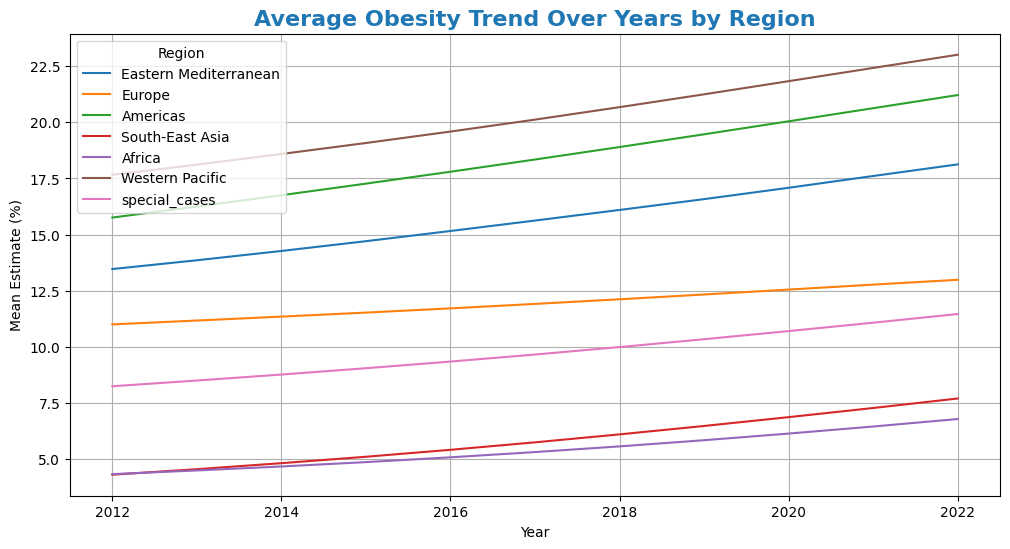

In [144]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_obesity, x='Year', y='Mean_Estimate', hue='Region', estimator='mean', ci=None)
plt.title(
    'Average Obesity Trend Over Years by Region',
    fontdict={
        'fontsize': 16,
        'fontweight': 'bold',
        'color': '#1f77b4',          # Customize the color
        'family': 'sans-serif'       # Other options: 'serif', 'monospace', 'cursive'
    }
)
plt.ylabel('Mean Estimate (%)')
plt.grid(True)
plt.show()

## 2. Bar Chart - Top 10 countries with highest average obesity:
üìñ **Storyline: "Where Waistlines Widen ‚Äî A Global Snapshot of Obesity Leaders"**

This bar chart isn‚Äôt just a ranking ‚Äî it‚Äôs a wake-up call. It reveals the countries where obesity has become a dominant public health challenge, often tied to urbanization, processed food consumption, sedentary lifestyles, and socioeconomic shifts.

**By showcasing the top 10 countries with the highest average obesity rates, you‚Äôre inviting viewers to ask:**

*   üß† What cultural or economic factors drive these numbers?
*   üè• Are healthcare systems in these nations equipped to handle obesity-related diseases?
*   üìâ Is there any sign of reversal, or are trends still climbing?







In [181]:
top10_obesity = (
    df_obesity.groupby('Country')['Mean_Estimate']
    .mean()
    .nlargest(10)
    .sort_values()
    .reset_index()
)

/tmp/ipython-input-2415687823.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm')
/tmp/ipython-input-2415687823.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


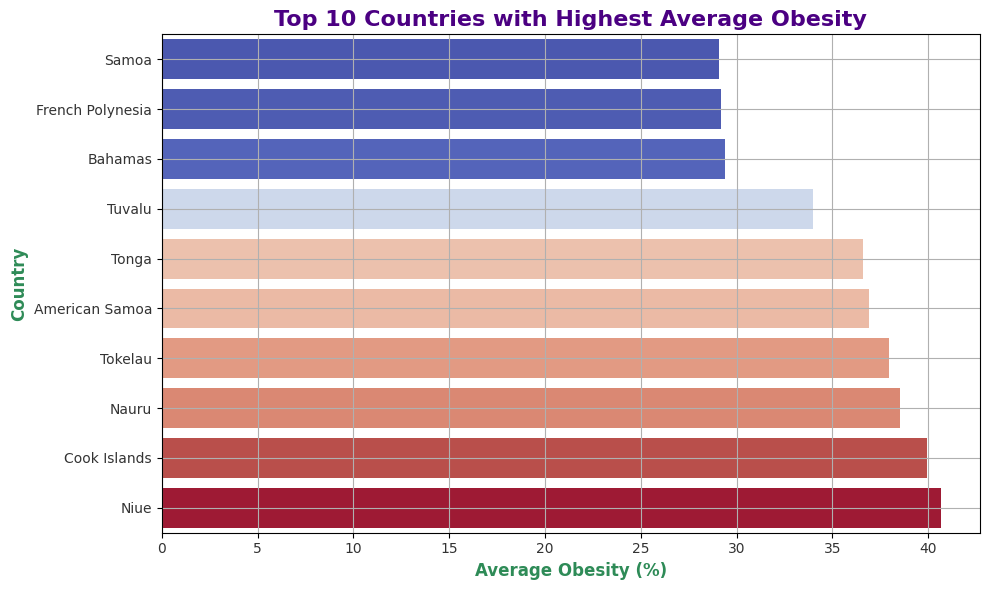

In [158]:
# Normalize the data to map values to colors
norm = mcolors.Normalize(vmin=top10_obesity['Mean_Estimate'].min(),
                         vmax=top10_obesity['Mean_Estimate'].max())

# Choose a colormap (try 'viridis', 'plasma', 'inferno', 'coolwarm')
cmap = cm.get_cmap('coolwarm')

# Map each value to a color
colors = [cmap(norm(value)) for value in top10_obesity['Mean_Estimate']]

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=top10_obesity,
    x='Mean_Estimate',
    y='Country',
    palette=colors
)

# Stylish title and labels
plt.title(
    'Top 10 Countries with Highest Average Obesity',
    fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': '#4B0082'}
)
plt.xlabel('Average Obesity (%)', fontsize=12, color='#2E8B57', fontweight='bold')
plt.ylabel('Country', fontsize=12, color='#2E8B57', fontweight='bold')
plt.xticks(color='#333333', fontsize=10)
plt.yticks(color='#333333', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


## 3."Malnutrition‚Äôs Gender Divide"
üìñ **Storyline: "Unboxing Inequality ‚Äî A Gendered Glimpse into Malnutrition"**
This visualization invites us to explore not just average malnutrition rates, but the distribution and variability between genders. The boxplot reveals how one gender might experience wider disparities ‚Äî suggesting greater vulnerability or systemic gaps in nutrition access.

/tmp/ipython-input-3850053737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_malnutrition, x='Gender', y='Mean_Estimate',


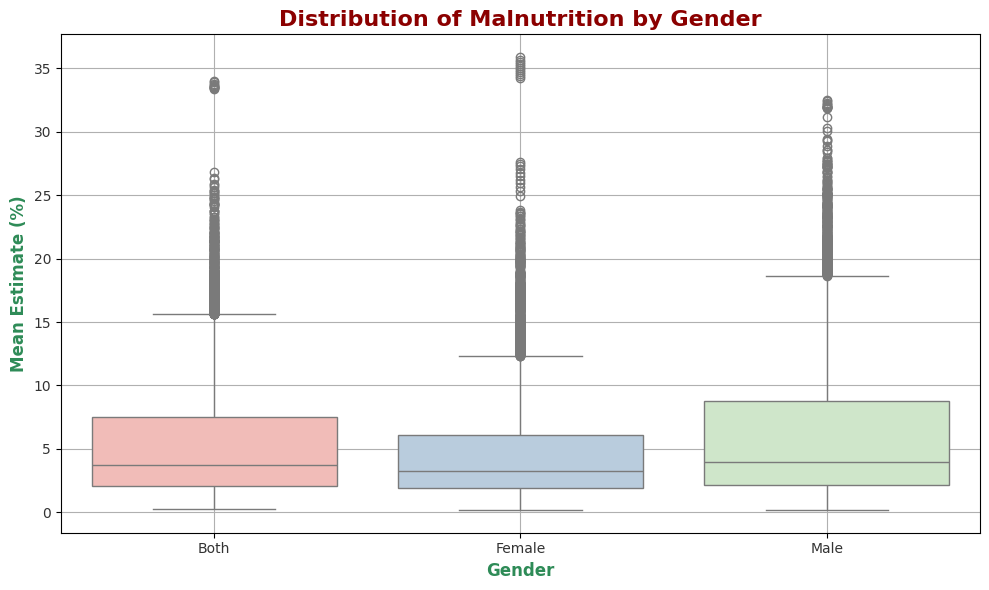

In [164]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_malnutrition, x='Gender', y='Mean_Estimate',
            palette='Pastel1')  # Use palette='set2' or palette='Set1' or palette='Dark2'
# These palette are best for Categorical data with distinct groups
# Title styling
plt.title(
    'Distribution of Malnutrition by Gender',
    fontdict={
        'fontsize': 16,
        'fontweight': 'bold',
        'color': '#8B0000',       # Dark red for emphasis
        'family': 'sans-serif'
    }
)

# Label styling
plt.ylabel('Mean Estimate (%)', fontsize=12, color='#2E8B57', fontweight='bold')
plt.xlabel('Gender', fontsize=12, color='#2E8B57', fontweight='bold')

# Tick label styling
plt.xticks(color='#333333', fontsize=10)
plt.yticks(color='#333333', fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()


## 4.Top 10 Countries by Obesity (Bar Chart)
üçîüìä **Story Title: "Global Heavyweights ‚Äî Top 10 Countries by Obesity"**

This isn‚Äôt just a leaderboard ‚Äî it‚Äôs a call to action. By spotlighting the top contributors to global obesity, the chart invites questions about lifestyle, culture, healthcare, and policy. Why do these nations top the list? Is it fast food, urbanization, genetics, or something else?

In [180]:
top_obese = df_obesity.groupby('Country')['Mean_Estimate'].mean().nlargest(10).reset_index()

/tmp/ipython-input-2163010661.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma')
/tmp/ipython-input-2163010661.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_obese, x='Mean_Estimate', y='Country', palette=colors)


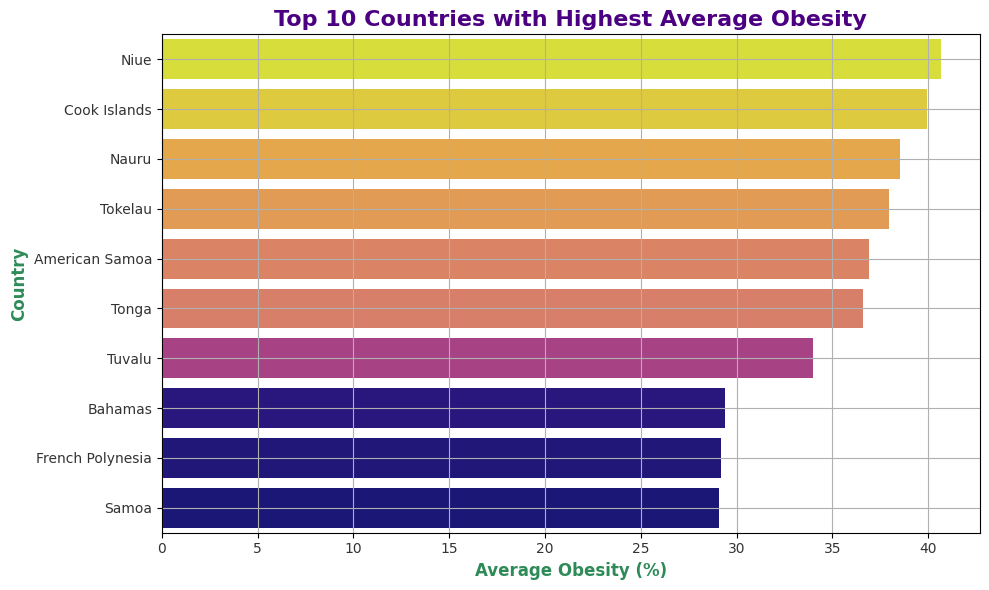

In [166]:
# Normalize values for gradient mapping
norm = mcolors.Normalize(vmin=top_obese['Mean_Estimate'].min(),
                         vmax=top_obese['Mean_Estimate'].max())

# Get colors from the 'plasma' colormap
cmap = cm.get_cmap('plasma')
colors = [cmap(norm(value)) for value in top_obese['Mean_Estimate']]

# Plot with custom gradient
plt.figure(figsize=(10,6))
sns.barplot(data=top_obese, x='Mean_Estimate', y='Country', palette=colors)

# Title styling
plt.title(
    'Top 10 Countries with Highest Average Obesity',
    fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': '#4B0082'}
)

# Axis label styling
plt.xlabel('Average Obesity (%)', fontsize=12, color='#2E8B57', fontweight='bold')
plt.ylabel('Country', fontsize=12, color='#2E8B57', fontweight='bold')

# Tick styling
plt.xticks(color='#333333', fontsize=10)
plt.yticks(color='#333333', fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()


## 5. Malnutrition by Region and Year (Heatmap):
.
üçÇ **Story Title: "Uneven Hunger ‚Äî Tracing Malnutrition Across Regions and Time"**

Picture this: A child in Region A grows up with nutritional support, while one in Region B struggles year after year. This heatmap isn‚Äôt just data ‚Äî it‚Äôs a revelation of how opportunity and hardship are geographically etched.

With the Region‚ÄìYear matrix you built, the heatmap can:

üî• **Highlight High-Burden**: Where malnutrition is persistently high, even as the years change.

üßä **Reveal Success Stories**: Regions that show consistent decline ‚Äî perhaps thanks to policy reforms or community action.

üï∞Ô∏è **Detect Shifting Vulnerabilities**: A region low-risk in 2000 might be high-risk in 2020. Why?

In [167]:

heat_data = df_malnutrition.pivot_table(index='Region', columns='Year', values='Mean_Estimate', aggfunc='mean')

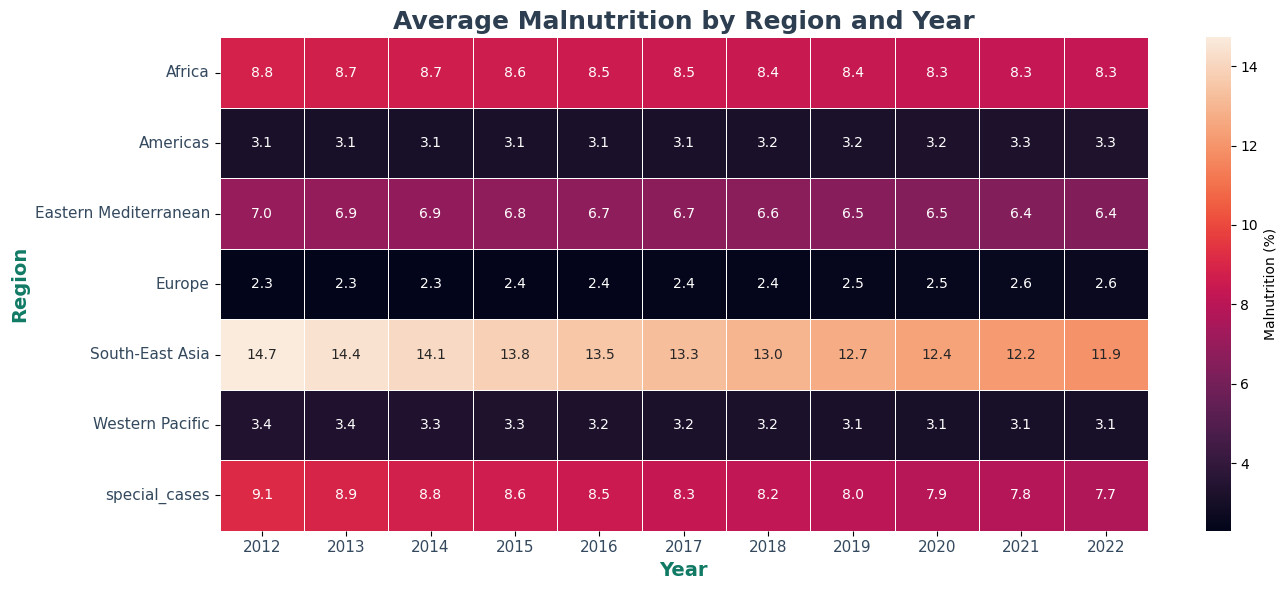

In [171]:
plt.figure(figsize=(14,6))
sns.heatmap(heat_data, annot=True, cmap='rocket', fmt='.1f',
            linewidths=0.5, linecolor='white', cbar_kws={'label': 'Malnutrition (%)'})

# Title styling
plt.title('Average Malnutrition by Region and Year',
          fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': '#2C3E50'})

# Axis label styling
plt.ylabel('Region', fontsize=14, color='#117A65', fontweight='bold')
plt.xlabel('Year', fontsize=14, color='#117A65', fontweight='bold')

# Tick label styling
plt.xticks(color='#34495E', fontsize=11)
plt.yticks(color='#34495E', fontsize=11)

plt.tight_layout()
plt.show()

## 6.Pivot the data to create a Region vs Year matrix
üåçüìÜ **Story Title: "Mapping the Momentum ‚Äî Regional Shifts in Nutrition Over Time"**
Imagine italicised text you‚Äôre tasked with tracking how different regions battle obesity or malnutrition across years. By pivoting the data into a Region vs Year matrix, you transform raw trends into a comparative landscape ‚Äî exposing who surged ahead, who stagnated, and where interventions might be urgently needed.
This matrix sets the stage for:

üìà **Heatmaps**: Visual intensity that spotlights sudden spikes or dips.

üéûÔ∏è **Animations**: Watch how regional health burdens ebb and flow with time.

üß≠ **Policy Mapping**: Use the matrix to align with government action or funding waves.

In [179]:
heatmap_data = df_obesity.pivot_table(index='Region', columns='Year', values='Mean_Estimate', aggfunc='mean')

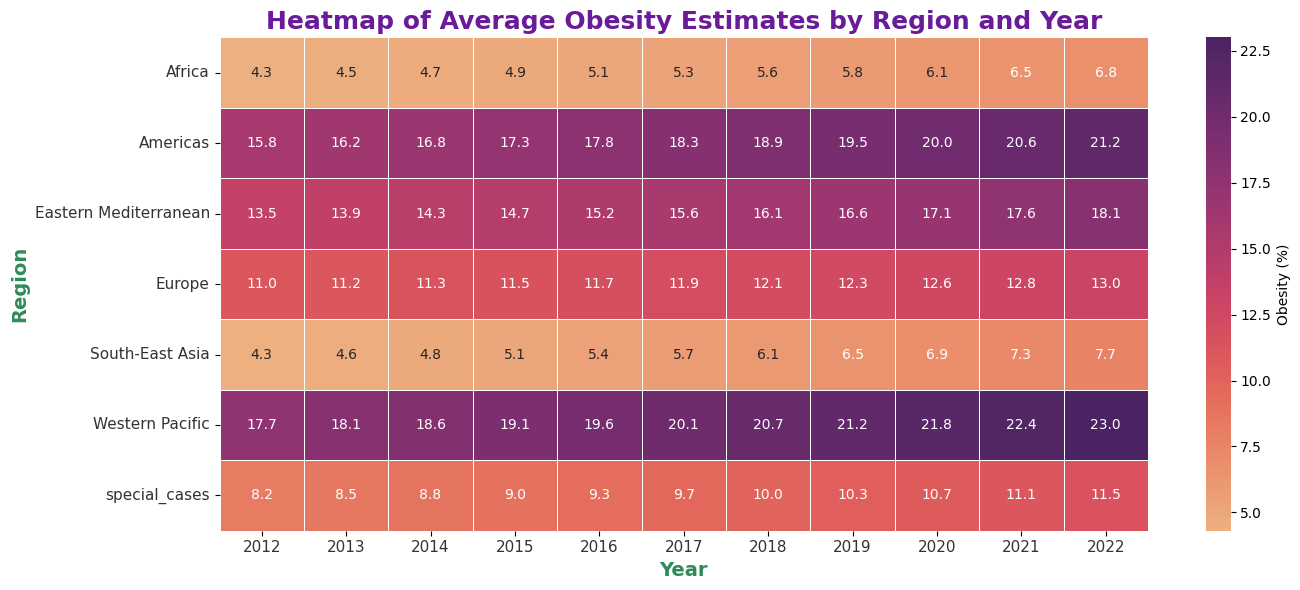

In [173]:
plt.figure(figsize=(14,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="flare",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Obesity (%)'}
)

# Title styling
plt.title(
    'Heatmap of Average Obesity Estimates by Region and Year',
    fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': '#6A1B9A'}
)

# Axis label styling
plt.ylabel('Region', fontsize=14, color='#2E8B57', fontweight='bold')
plt.xlabel('Year', fontsize=14, color='#2E8B57', fontweight='bold')

# Tick labels
plt.xticks(color='#333333', fontsize=11)
plt.yticks(color='#333333', fontsize=11)

plt.tight_layout()
plt.show()


## üìä 7. Gender Gap in Obesity Over Time
**Story: How has the gap between male and female obesity prevalence evolved? Are trends converging or diverging?**

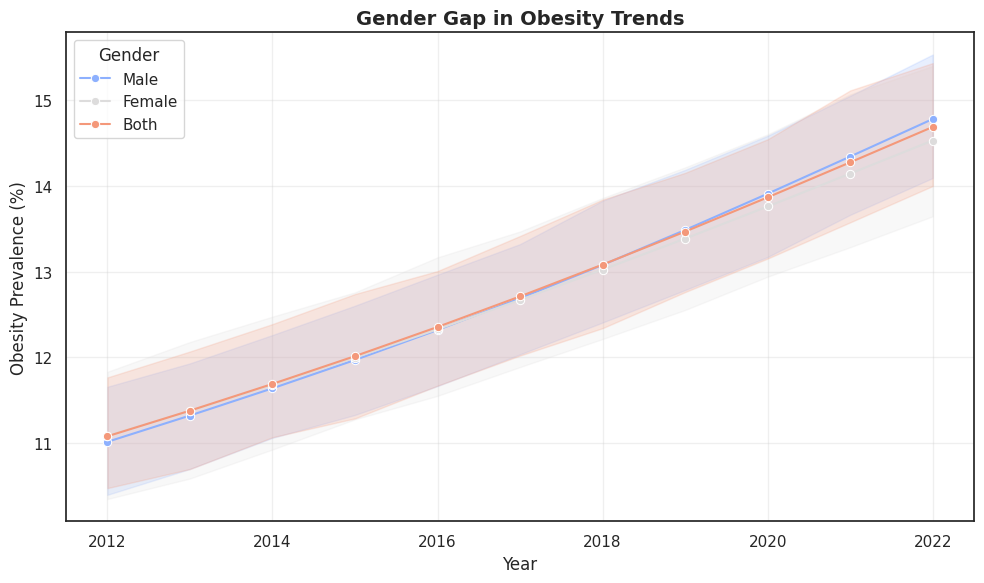

In [176]:
sns.set_theme(style="white", palette="Set2")

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_obesity,
    x="Year", y="Mean_Estimate", hue="Gender",
    estimator="mean", marker="o", palette="coolwarm"
)
plt.title("Gender Gap in Obesity Trends", fontsize=14, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Obesity Prevalence (%)", fontsize=12)
plt.legend(title="Gender")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## üçΩÔ∏è 8. Intersecting Trends of Obesity vs. Malnutrition
**Story: Despite being opposite ends of the nutritional spectrum, can obesity and malnutrition coexist within the same regions or demographics over time?**

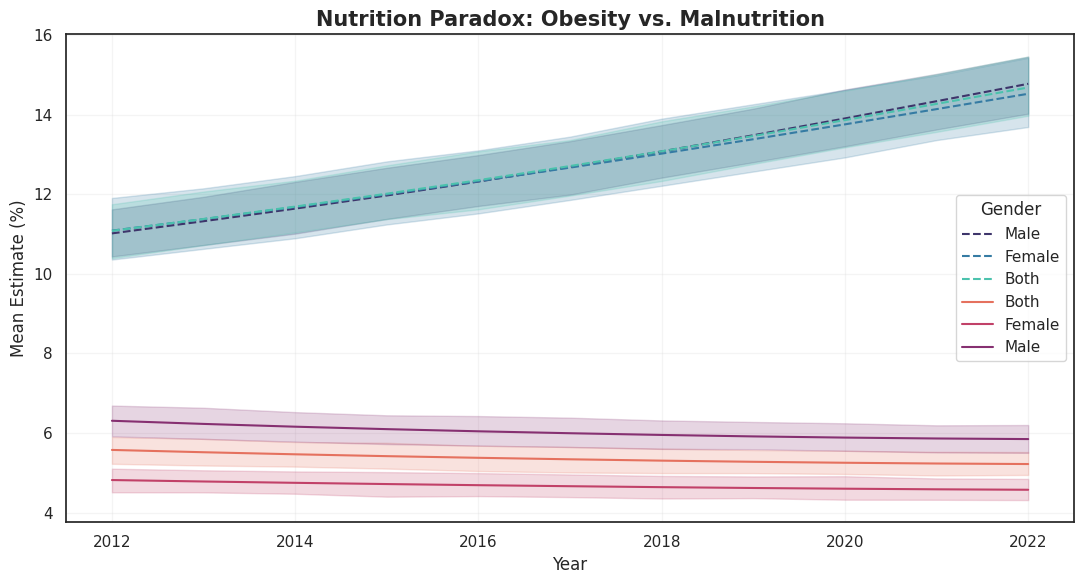

In [178]:
fig, ax = plt.subplots(figsize=(11, 6))

# Obesity Line
sns.lineplot(
    data=df_obesity,
    x="Year", y="Mean_Estimate", hue="Gender",
    estimator="mean", linestyle="--", palette="mako", ax=ax
)

# Malnutrition Line
sns.lineplot(
    data=df_malnutrition,
    x="Year", y="Mean_Estimate", hue="Gender",
    estimator="mean", palette="flare", ax=ax
)

plt.title("Nutrition Paradox: Obesity vs. Malnutrition", fontsize=15, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean Estimate (%)", fontsize=12)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


# **Step 4: MySQL Database Setup**

In [63]:
pip install mysql-connector-python streamlit

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9.9/9.9 MB 67.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.9/6.9 MB 108.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [64]:
import mysql.connector  # For MySQL database operations
from mysql.connector import Error
import pandas as pd  # For data manipulation and analysis
import streamlit as st  # For building the interactive web app
from datetime import datetime, timedelta  # For handling dates and times
import sys


In [65]:

# Database configuration
db_config = {
    'host': 'gateway01.ap-southeast-1.prod.aws.tidbcloud.com',
    'port': '4000',
    'user': '2yAFaedwBArCDSP.root',
    'password': 'OKWXUUFbHCuz3Oct',
}

# Connect to MySQL
conn = mysql.connector.connect(**db_config)
cur = conn.cursor()
print("Connected to MySQL!")

Connected to MySQL!


In [66]:
cur.execute("CREATE DATABASE IF NOT EXISTS Nutrition_Paradox")
cur.execute("USE Nutrition_Paradox")

In [ ]:
 # Create obesity table
cur.execute("""
        CREATE TABLE IF NOT EXISTS obesity (
            id INT AUTO_INCREMENT PRIMARY KEY,
            Year INT NOT NULL,
            Gender VARCHAR(10) NOT NULL,
            Mean_Estimate DECIMAL(5,2) NOT NULL,
            LowerBound DECIMAL(5,2),
            UpperBound DECIMAL(5,2),
            Age_Group VARCHAR(20) NOT NULL,
            Country VARCHAR(100) NOT NULL,
            Region VARCHAR(100),
            CI_Width DECIMAL(5,2) GENERATED ALWAYS AS (UpperBound - LowerBound) STORED,
            Obesity_Level VARCHAR(20),
            created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
            INDEX idx_country (Country),
            INDEX idx_year (Year),
            INDEX idx_region (Region)
        )
        """)
conn.commit()
print("obesity table created!")

obesity table created!


In [ ]:
 # Create malnutrition table
cur.execute("""
        CREATE TABLE IF NOT EXISTS malnutrition (
            id INT AUTO_INCREMENT PRIMARY KEY,
            Year INT NOT NULL,
            Gender VARCHAR(10) NOT NULL,
            Mean_Estimate DECIMAL(5,2) NOT NULL,
            LowerBound DECIMAL(5,2),
            UpperBound DECIMAL(5,2),
            Age_Group VARCHAR(20) NOT NULL,
            Country VARCHAR(100) NOT NULL,
            Region VARCHAR(100),
            CI_Width DECIMAL(5,2) GENERATED ALWAYS AS (UpperBound - LowerBound) STORED,
            Malnutrition_Level VARCHAR(20),
            created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
            INDEX idx_country (Country),
            INDEX idx_year (Year),
            INDEX idx_region (Region)
        )
        """)
conn.commit()
print("malnutrition table created!")

malnutrition table created!


In [ ]:
print(df_obesity.shape)
print(df_malnutrition.shape)

(27720, 10)
(27720, 10)


In [ ]:
def insert_data_iterrows(df, table_name, conn, cur):
    """
    Inserts data row-by-row into MySQL using iterrows, skipping auto/computed columns.
    """
    print(f"Inserting into {table_name}...")

    # Columns to exclude from manual insert
    excluded = ['id', 'CI_Width', 'created_at']
    columns = [col for col in df.columns if col not in excluded]

    column_names = ', '.join(columns)
    placeholders = ', '.join(['%s'] * len(columns))
    insert_query = f"INSERT INTO {table_name} ({column_names}) VALUES ({placeholders})"

    inserted = 0
    for idx, row in df.iterrows():
        try:
            values = tuple(row[col] for col in columns)
            cur.execute(insert_query, values)
            inserted += 1

            # Optional progress logging
            if inserted % 10000 == 0:
                print(f"{inserted} rows inserted into {table_name}...")
        except Exception as e:
            print(f"‚ö†Ô∏è Row {idx} failed: {e}")
            continue

    conn.commit()
    print(f"‚úÖ Inserted {inserted} rows into '{table_name}'")

In [ ]:
insert_data_iterrows(df_obesity, 'obesity', conn, cur)
insert_data_iterrows(df_malnutrition, 'malnutrition', conn, cur)


Inserting into obesity...
10000 rows inserted into obesity...
20000 rows inserted into obesity...
‚úÖ Inserted 27720 rows into 'obesity'
Inserting into malnutrition...
10000 rows inserted into malnutrition...
20000 rows inserted into malnutrition...
‚úÖ Inserted 27720 rows into 'malnutrition'


In [67]:
cur.execute("SELECT * FROM obesity")
data = cur.fetchall()
#fetches the names of your columns in dataframe(cursor.description holds the columns info)
columns = [i[0] for i in cur.description]


In [68]:
import pandas as pd
# using the result fetched in cursor, create a new dataframe
df_obesity_sql = pd.DataFrame(data,columns=columns)
df_obesity_sql

id  Year  Gender Mean_Estimate LowerBound UpperBound  \
0      30001  2020    Male         25.50      23.10      27.90   
1      30002  2021  Female         30.20      28.50      31.80   
2      60001  2020    Male         17.49      15.79      19.25   
3      60002  2020    Male         28.34      23.09      33.82   
4      60003  2014  Female         27.95      24.92      31.21   
...      ...   ...     ...           ...        ...        ...   
35021  95020  2020    Both          1.48       0.96       2.20   
35022  95021  2012  Female          1.97       0.30       5.87   
35023  95022  2021    Male         16.63       3.33      34.88   
35024  95023  2014    Male          2.03       0.24       6.34   
35025  95024  2017    Male         11.39      10.09      12.76   

              Age_Group                    Country                 Region  \
0                Adults                      India             South Asia   
1                Adults                      India             South Asia   
2                 Adult  Iran, Islamic Republic of  Eastern Mediterranean   
3                 Adult                       Iraq  Eastern Mediterranean   
4                 Adult                  Greenland                 Europe   
...                 ...                        ...                    ...   
35021  Child/Adolescent                 Tajikistan                 Europe   
35022  Child/Adolescent                    Somalia  Eastern Mediterranean   
35023  Child/Adolescent                    Vanuatu        Western Pacific   
35024  Child/Adolescent                 Madagascar                 Africa   
35025  Child/Adolescent                    Finland                 Europe   

      CI_Width Obesity_Level          created_at  
0         4.80      Moderate 2025-07-28 18:48:06  
1         3.30          High 2025-07-28 18:48:06  
2         3.46           Low 2025-07-29 17:07:58  
3        10.73      Moderate 2025-07-29 17:07:58  
4         6.29      Moderate 2025-07-29 17:07:58  
...        ...           ...                 ...  
35021     1.24           Low 2025-07-29 17:57:53  
35022     5.57           Low 2025-07-29 17:57:53  
35023    31.55           Low 2025-07-29 17:57:54  
35024     6.10           Low 2025-07-29 17:57:54  
35025     2.67           Low 2025-07-29 17:57:54  

[35026 rows x 12 columns]

In [69]:
df_obesity_sql.to_csv('final_obesity.csv', index=False)

In [70]:
cur.execute("SELECT * FROM malnutrition")
data = cur.fetchall()

#fetches the names of your columns in dataframe(cursor.description holds the columns info)
columns1 = [i[0] for i in cur.description]

In [71]:
import pandas as pd
# using the result fetched in cursor, create a new dataframe
df_malnutrition_sql = pd.DataFrame(data,columns=columns1)

df_malnutrition_sql

id  Year  Gender Mean_Estimate LowerBound UpperBound  \
0          1  2020    Male         15.50      13.10      17.90   
1          2  2021  Female         18.20      16.50      19.80   
2      30001  2021  Female          5.80       3.97       8.08   
3      30002  2017    Both          3.09       2.43       3.84   
4      30003  2016  Female          8.37       6.66      10.25   
...      ...   ...     ...           ...        ...        ...   
27717  57716  2013  Female          4.14       2.80       5.71   
27718  57717  2018    Both          7.57       5.43      10.22   
27719  57718  2016    Both          1.70       0.62       3.51   
27720  57719  2020  Female          0.73       0.06       2.81   
27721  57720  2018    Male          2.54       0.47       7.31   

              Age_Group           Country           Region CI_Width  \
0              Children             India       South Asia     4.80   
1              Children             India       South Asia     3.30   
2                 Adult             Gabon           Africa     4.11   
3                 Adult          Mongolia  Western Pacific     1.41   
4                 Adult      Sierra Leone           Africa     3.59   
...                 ...               ...              ...      ...   
27717  Child/Adolescent             Haiti         Americas     2.91   
27718  Child/Adolescent        Tajikistan           Europe     4.79   
27719  Child/Adolescent  Papua New Guinea  Western Pacific     2.89   
27720  Child/Adolescent             Samoa  Western Pacific     2.75   
27721  Child/Adolescent           Iceland           Europe     6.84   

      Malnutrition_Level          created_at  
0               Moderate 2025-07-28 18:48:06  
1                   High 2025-07-28 18:48:06  
2                    Low 2025-07-29 17:57:57  
3                    Low 2025-07-29 17:57:57  
4                    Low 2025-07-29 17:57:57  
...                  ...                 ...  
27717                Low 2025-07-29 18:38:05  
27718                Low 2025-07-29 18:38:05  
27719                Low 2025-07-29 18:38:05  
27720                Low 2025-07-29 18:38:05  
27721                Low 2025-07-29 18:38:06  

[27722 rows x 12 columns]

In [72]:
df_malnutrition_sql.to_csv('final_malnutrition.csv', index=False)

# **Step 5 : SQL QUERIES**

## **üßã Obesity Table (10 Queries)**

üìä 1. Top 5 regions with the highest average obesity levels (2022)

In [86]:
# Database configuration
db_config = {
    'host': 'gateway01.ap-southeast-1.prod.aws.tidbcloud.com',
    'port': '4000',
    'user': '2yAFaedwBArCDSP.root',
    'password': 'OKWXUUFbHCuz3Oct',
}

# Connect to MySQL
conn = mysql.connector.connect(**db_config)
cur = conn.cursor()
print("Connected to MySQL!")

cur.execute("CREATE DATABASE IF NOT EXISTS Nutrition_Paradox")
cur.execute("USE Nutrition_Paradox")

Connected to MySQL!


In [83]:
results = cur.fetchall()

In [84]:
def run_query(query):
    cur.execute(query)
    return cur.fetchall()

In [97]:
query1 =("""
    SELECT region, AVG(mean_estimate) AS avg_obesity
    FROM obesity
    WHERE year = 2022
    GROUP BY region
    ORDER BY avg_obesity DESC
    LIMIT 5
""")
show_query(query1)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


region  avg_obesity
0        Western Pacific    25.433846
1               Americas    23.306988
2  Eastern Mediterranean    20.283904
3                 Europe    15.354045
4          special_cases    12.664880

üåç 2. Top 5 countries with highest obesity estimates

In [98]:
query2 =("""
SELECT Country, MAX(Mean_estimate) AS peak_obesity
FROM obesity
GROUP BY Country
ORDER BY peak_obesity DESC
LIMIT 5;
""")
show_query(query2)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Country  peak_obesity
0  American Samoa         80.61
1           Tonga         79.05
2           Samoa         72.62
3         Tokelau         72.49
4    Cook Islands         71.51

üáÆüá≥ 3. Obesity trend in India over the years

In [100]:
query3 =("""
SELECT Year, AVG(Mean_estimate) AS avg_obesity
FROM obesity
WHERE Country = 'India'
GROUP BY Year
ORDER BY Year;
""")
show_query(query3)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Year  avg_obesity
0   2012     2.776000
1   2013     2.957333
2   2014     3.142000
3   2015     3.357647
4   2016     3.550000
5   2017     3.776000
6   2018     3.974375
7   2019     4.180625
8   2020     5.845625
9   2021     6.403125
10  2022     5.112667


üöª 4. Average obesity by gender

In [101]:
query4 =("""
SELECT Gender, AVG(Mean_estimate) AS avg_obesity
FROM obesity
GROUP BY Gender;
""")
show_query(query4)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Gender  avg_obesity
0    Both    14.542016
1  Female    15.205388
2    Male    13.814760

üë∂üëµ 5. Country count by obesity level category and age group

In [105]:
query5 =("""
SELECT Obesity_Level, Age_group, COUNT(DISTINCT Country) AS country_count
FROM obesity
GROUP BY Obesity_Level, Age_group;
""")
show_query(query5)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Obesity_Level         Age_group  country_count
0      Moderate            Adults              1
1          High            Adults              1
2           Low             Adult            176
3      Moderate             Adult             99
4          High             Adult             94
5           Low  Child/Adolescent            210
6          High  Child/Adolescent             11
7      Moderate  Child/Adolescent             26

‚ö†Ô∏è 6. Reliability via CI_Width (Top 5 highest/lowest)

In [107]:
# Most and Least Reliable Countries (CI_Width)

In [112]:
query6 =("""
SELECT Country, AVG(CI_Width) AS avg_ci
FROM obesity
GROUP BY Country
ORDER BY avg_ci DESC
LIMIT 5;
""")
show_query(query6)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Country     avg_ci
0              Bermuda  24.232695
1  Antigua and Barbuda  22.129096
2       American Samoa  21.077455
3          Puerto Rico  19.924970
4              Grenada  19.359231

In [108]:
# Most consistent: lowest average CI_Width

In [111]:
query6a =("""
SELECT Country, AVG(CI_Width) AS avg_ci
FROM obesity
GROUP BY Country
ORDER BY avg_ci ASC
LIMIT 5;
""")
show_query(query6a)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Country    avg_ci
0                  Global  0.680000
1     Low & Middle Income  0.826506
2  South-East Asia Region  0.985542
3                   Japan  1.148072
4                   India  1.152573

üéÇ 7. Average obesity by age group

In [113]:
query7 =("""
SELECT Age_group, AVG(Mean_estimate) AS avg_obesity
FROM obesity
GROUP BY Age_group;
""")
show_query(query7)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Age_group  avg_obesity
0            Adults     27.85000
1             Adult     21.83324
2  Child/Adolescent      9.73044

üü¢ 8. Consistently low-obesity countries

In [114]:
query8 =("""
SELECT Country, AVG(Mean_estimate) AS avg_obesity, AVG(CI_Width) AS avg_ci
FROM obesity
GROUP BY Country
HAVING avg_obesity < 10 AND avg_ci < 2
ORDER BY avg_obesity ASC, avg_ci ASC
LIMIT 10;
""")
show_query(query8)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Country  avg_obesity    avg_ci
0             Timor-Leste     1.104464  1.222798
1                Ethiopia     1.538869  1.436726
2            Burkina Faso     2.260359  1.540359
3              Bangladesh     2.330364  1.550424
4                   Japan     4.060181  1.148072
5                   India     4.112573  1.152573
6  South-East Asia Region     4.628434  0.985542
7              Low Income     4.876325  1.741687
8                  Africa     5.538443  1.311976
9     Low & Middle Income     6.428795  0.826506

üë©‚Äç‚öïÔ∏èüë®‚Äç‚öïÔ∏è 9. Countries where female obesity exceeds male by large margin

In [115]:
query9 =("""
SELECT f.Country, f.Year, f.Mean_estimate - m.Mean_estimate AS diff
FROM obesity f
JOIN obesity m ON f.Country = m.Country AND f.Year = m.Year
WHERE f.Gender = 'Female' AND m.Gender = 'Male'
AND f.Mean_estimate - m.Mean_estimate > 10
ORDER BY diff DESC;""")
show_query(query9)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Country  Year   diff
0      American Samoa  2012  53.25
1      American Samoa  2012  53.25
2      American Samoa  2012  53.11
3      American Samoa  2012  53.11
4      American Samoa  2012  52.86
...               ...   ...    ...
11878      Montenegro  2019  10.01
11879         Vanuatu  2016  10.01
11880            Oman  2015  10.01
11881            Oman  2015  10.01
11882            Oman  2015  10.01

[11883 rows x 3 columns]

üåê 10. Global average obesity percentage per year

In [116]:
query10 =("""
SELECT Year, AVG(Mean_estimate) AS global_avg
FROM obesity
GROUP BY Year
ORDER BY Year;
""")
show_query(query10)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Year  global_avg
0   2012   12.711424
1   2013   13.044139
2   2014   13.384412
3   2015   13.703189
4   2016   14.081144
5   2017   14.441673
6   2018   14.842616
7   2019   15.242091
8   2020   15.668562
9   2021   16.105783
10  2022   16.496237

## **üß™ Malnutrition SQL Queries**

In [118]:
# Database configuration
db_config = {
    'host': 'gateway01.ap-southeast-1.prod.aws.tidbcloud.com',
    'port': '4000',
    'user': '2yAFaedwBArCDSP.root',
    'password': 'OKWXUUFbHCuz3Oct',
}

# Connect to MySQL
conn = mysql.connector.connect(**db_config)
cur = conn.cursor()
print("Connected to MySQL!")

cur.execute("CREATE DATABASE IF NOT EXISTS Nutrition_Paradox")
cur.execute("USE Nutrition_Paradox")

Connected to MySQL!


Avg. malnutrition by age group ‚Äì üßíüìä

In [119]:
querym1 =("""
SELECT Age_Group, AVG(Mean_Estimate) AS Avg_Malnutrition
FROM Malnutrition
GROUP BY Age_Group;
""")
show_query(querym1)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Age_Group  Avg_Malnutrition
0          Children         16.850000
1  Child/Adolescent          5.159055
2             Adult          5.940596

Top 5 countries with highest malnutrition ‚Äì üåçüî•

In [120]:
querym2 = ("""
SELECT Country, AVG(Mean_Estimate) AS Avg_Malnutrition
FROM Malnutrition
GROUP BY Country
ORDER BY Avg_Malnutrition DESC
LIMIT 5;
""")
show_query(querym2)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Country  Avg_Malnutrition
0                   India         22.063433
1  South-East Asia Region         19.239091
2              Bangladesh         18.245909
3               Sri Lanka         17.871742
4                 Eritrea         17.472879

Malnutrition trend in African region over the years ‚Äì üåçüìà

In [121]:
querym3 = ("""
SELECT Year, AVG(Mean_Estimate) AS African_Trend
FROM Malnutrition
WHERE Region = 'Africa'
GROUP BY Year
ORDER BY Year;
""")
show_query(querym3)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Year  African_Trend
0   2012       8.849645
1   2013       8.749823
2   2014       8.663103
3   2015       8.587553
4   2016       8.522961
5   2017       8.466489
6   2018       8.414645
7   2019       8.369663
8   2020       8.331348
9   2021       8.298422
10  2022       8.269894

In [122]:
querym4 = ("""
SELECT Gender, AVG(Mean_Estimate) AS Avg_Malnutrition
FROM Malnutrition
GROUP BY Gender;
""")
show_query(querym4)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Gender  Avg_Malnutrition
0  Female          4.676906
1    Male          6.027331
2    Both          5.361573

In [123]:
querym5 = ("""
SELECT Age_Group, AVG(CI_Width) AS Avg_CI_Width
FROM Malnutrition
GROUP BY Age_Group;
""")
show_query(querym5)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Age_Group  Avg_CI_Width
0             Adult      3.693847
1  Child/Adolescent      5.103122
2          Children      4.050000

In [124]:
querym6 = ("""
SELECT Country, Year, AVG(Mean_Estimate) AS Avg_Malnutrition
FROM Malnutrition
WHERE Country IN ('India', 'Nigeria', 'Brazil')
GROUP BY Country, Year
ORDER BY Country, Year;
""")
show_query(querym6)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Country  Year  Avg_Malnutrition
0    Brazil  2012          2.840000
1    Brazil  2013          2.781667
2    Brazil  2014          2.734167
3    Brazil  2015          2.698333
4    Brazil  2016          2.672500
5    Brazil  2017          2.654167
6    Brazil  2018          2.641667
7    Brazil  2019          2.635000
8    Brazil  2020          2.629167
9    Brazil  2021          2.628333
10   Brazil  2022          2.625833
11    India  2012         25.191667
12    India  2013         24.608333
13    India  2014         24.015833
14    India  2015         23.400000
15    India  2016         22.770833
16    India  2017         22.139167
17    India  2018         21.510833
18    India  2019         20.887500
19    India  2020         19.906923
20    India  2021         19.563077
21    India  2022         19.091667
22  Nigeria  2012         11.248333
23  Nigeria  2013         11.315833
24  Nigeria  2014         11.416667
25  Nigeria  2015         11.541667
26  Nigeria  2016         11.686667
27  Nigeria  2017         11.841667
28  Nigeria  2018         12.001667
29  Nigeria  2019         12.169167
30  Nigeria  2020         12.340833
31  Nigeria  2021         12.520000
32  Nigeria  2022         12.700833

In [ ]:
querym3 = ("""

""")
show_query(querym3)

In [125]:
querym7 = ("""
SELECT Region, AVG(Mean_Estimate) AS Avg_Malnutrition
FROM Malnutrition
GROUP BY Region
ORDER BY Avg_Malnutrition ASC
LIMIT 5;
""")
show_query(querym7)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Region  Avg_Malnutrition
0                 Europe          2.426808
1               Americas          3.174705
2        Western Pacific          3.220462
3  Eastern Mediterranean          6.661371
4          special_cases          8.354077

In [126]:
querym8 = ("""
SELECT Country, MAX(Mean_Estimate) - MIN(Mean_Estimate) AS Increase
FROM Malnutrition
GROUP BY Country
HAVING Increase > 0
ORDER BY Increase DESC;
""")
show_query(querym8)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Country  Increase
0           Eritrea     28.02
1          Ethiopia     21.75
2           Somalia     20.83
3             India     18.83
4          Pakistan     17.74
..              ...       ...
205    Cook Islands      1.19
206            Peru      1.16
207            Niue      0.90
208  American Samoa      0.90
209           Tonga      0.89

[210 rows x 2 columns]

In [127]:
querym9 = ("""
SELECT Year,
       MIN(Mean_Estimate) AS Min_Malnutrition,
       MAX(Mean_Estimate) AS Max_Malnutrition
FROM Malnutrition
GROUP BY Year
ORDER BY Year;
""")
show_query(querym9)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Year  Min_Malnutrition  Max_Malnutrition
0   2012              0.18             35.89
1   2013              0.18             35.69
2   2014              0.18             35.50
3   2015              0.18             35.31
4   2016              0.18             35.15
5   2017              0.18             35.00
6   2018              0.18             34.86
7   2019              0.18             34.72
8   2020              0.18             34.58
9   2021              0.18             34.43
10  2022              0.19             34.26

In [128]:
querym10 = ("""
SELECT Country, Year, Age_Group, Gender, CI_Width
FROM Malnutrition
WHERE CI_Width > 5
ORDER BY CI_Width DESC;
""")
show_query(querym10)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Country  Year         Age_Group  Gender  CI_Width
0           Senegal  2022  Child/Adolescent    Male     26.70
1           Senegal  2021  Child/Adolescent    Male     25.68
2           Senegal  2020  Child/Adolescent    Male     24.58
3        Mauritania  2022  Child/Adolescent    Male     23.82
4           Senegal  2019  Child/Adolescent    Male     23.47
...             ...   ...               ...     ...       ...
9556       Dominica  2015  Child/Adolescent    Male      5.01
9557    Philippines  2022  Child/Adolescent    Both      5.01
9558       Botswana  2013             Adult  Female      5.01
9559  C√¥te d'Ivoire  2022  Child/Adolescent  Female      5.01
9560        Lesotho  2022  Child/Adolescent  Female      5.01

[9561 rows x 5 columns]

## **üîó Combined (5 Queries)**

In [129]:
# Database configuration
db_config = {
    'host': 'gateway01.ap-southeast-1.prod.aws.tidbcloud.com',
    'port': '4000',
    'user': '2yAFaedwBArCDSP.root',
    'password': 'OKWXUUFbHCuz3Oct',
}

# Connect to MySQL
conn = mysql.connector.connect(**db_config)
cur = conn.cursor()
print("Connected to MySQL!")

cur.execute("CREATE DATABASE IF NOT EXISTS Nutrition_Paradox")
cur.execute("USE Nutrition_Paradox")

Connected to MySQL!


Obesity vs malnutrition comparison by country (any 5) ‚Äì ‚öñÔ∏èüåé

In [130]:
queryC1 = ("""
SELECT o.Country,
       AVG(o.Mean_Estimate) AS Avg_Obesity,
       AVG(m.Mean_Estimate) AS Avg_Malnutrition
FROM Obesity o
JOIN Malnutrition m ON o.Country = m.Country AND o.Year = m.Year
WHERE o.Country IN ('India', 'USA', 'Brazil', 'Nigeria', 'Japan')
GROUP BY o.Country;
""")
show_query(queryC1)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Country  Avg_Obesity  Avg_Malnutrition
0  Nigeria     5.339822         11.891657
1    India     4.143464         22.039822
2   Brazil    18.024848          2.685530
3    Japan     4.060181          3.839503

Gender-based disparity in both obesity and malnutrition ‚Äì ‚ôÄÔ∏è‚ôÇÔ∏èüîç

In [131]:
queryC2 = ("""
SELECT o.Gender,
       AVG(o.Mean_Estimate) AS Avg_Obesity,
       AVG(m.Mean_Estimate) AS Avg_Malnutrition
FROM Obesity o
JOIN Malnutrition m ON o.Gender = m.Gender AND o.Year = m.Year AND o.Country = m.Country
GROUP BY o.Gender;
""")
show_query(queryC2)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Gender  Avg_Obesity  Avg_Malnutrition
0    Male    13.813963          6.033344
1  Female    15.204655          4.678226
2    Both    14.542016          5.362076

Region-wise avg estimates side-by-side (Africa & America) ‚Äì üåçüîÑüåé

In [132]:
queryC3 = ("""
SELECT o.Region,
       AVG(o.Mean_Estimate) AS Avg_Obesity,
       AVG(m.Mean_Estimate) AS Avg_Malnutrition
FROM Obesity o
JOIN Malnutrition m ON o.Region = m.Region AND o.Year = m.Year
WHERE o.Region IN ('Africa', 'America')
GROUP BY o.Region;
""")
show_query(queryC3)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Region  Avg_Obesity  Avg_Malnutrition
0  Africa     6.332651          8.501781

Countries with obesity up & malnutrition down ‚Äì üìà‚¨ÜÔ∏èüìâ‚¨áÔ∏è

In [133]:
queryC4 = ("""
SELECT o.Country,
       MAX(o.Mean_Estimate) - MIN(o.Mean_Estimate) AS Obesity_Change,
       MIN(m.Mean_Estimate) - MAX(m.Mean_Estimate) AS Malnutrition_Change
FROM Obesity o
JOIN Malnutrition m ON o.Country = m.Country AND o.Year = m.Year
GROUP BY o.Country
HAVING Obesity_Change > 0 AND Malnutrition_Change > 0;
""")
show_query(queryC4)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Empty DataFrame
Columns: [Country, Obesity_Change, Malnutrition_Change]
Index: []

Age-wise trend analysis ‚Äì üë∂‚û°Ô∏èüë¥üìä

In [134]:
queryC5 = ("""
SELECT o.Age_Group, o.Year,
       AVG(o.Mean_Estimate) AS Avg_Obesity,
       AVG(m.Mean_Estimate) AS Avg_Malnutrition
FROM Obesity o
JOIN Malnutrition m ON o.Age_Group = m.Age_Group AND o.Year = m.Year
GROUP BY o.Age_Group, o.Year
ORDER BY o.Age_Group, o.Year;
""")
show_query(queryC5)

/tmp/ipython-input-3918258786.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Age_Group  Year  Avg_Obesity  Avg_Malnutrition
0              Adult  2012    19.517968          6.443619
1              Adult  2013    19.949349          6.320873
2              Adult  2014    20.391556          6.206556
3              Adult  2015    20.847095          6.099556
4              Adult  2016    21.315413          5.999444
5              Adult  2017    21.790254          5.906619
6              Adult  2018    22.269540          5.820825
7              Adult  2019    22.757270          5.741302
8              Adult  2020    23.262159          5.667762
9              Adult  2021    23.777222          5.599524
10             Adult  2022    24.287810          5.540476
11  Child/Adolescent  2012     8.246955          5.274370
12  Child/Adolescent  2013     8.529056          5.238111
13  Child/Adolescent  2014     8.790760          5.207280
14  Child/Adolescent  2015     9.029605          5.181159
15  Child/Adolescent  2016     9.336127          5.159190
16  Child/Adolescent  2017     9.616655          5.140667
17  Child/Adolescent  2018     9.998970          5.124344
18  Child/Adolescent  2019    10.310255          5.112312
19  Child/Adolescent  2020    10.674943          5.105048
20  Child/Adolescent  2021    11.079766          5.102709
21  Child/Adolescent  2022    11.414777          5.104418

# üìä **Step 5: Power BI Visualization**
**Tasks(Optional) Connect SQL database to Power BI, load both the obesity_data and malnutrition_data tables, and use them to develop an interactive dashboard.**